In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import acquire
import prepare
from env import get_db_url
import time
import warnings
warnings.filterwarnings("ignore")
import explore

### Questions to keep in mind (5 should be answered very thoroughly. Could touch on all, but 5 min- for MVP)

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?

In [2]:
df = prepare.prepare_logs()

In [3]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
0,/,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08 00:00:00,2018-05-17 00:00:00,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24


#### initial thoughts
- I want to look into this a little further to make sure we wouldn't be losing something important, but could consider dropping, especially for MVP
- deleted_at column should be dropped
- data, time, start_date, end_date, created_at, updated_at - by the names of these columns, thinking can convert to datetime
- path probably makes sense to stay object, but can we potentially look at groups/feature eng columns here? possibility to keep in mind
- user_id as int - this is fine for now, but want to make sure this is not treated as continuous I'm thinking
- cohort id- could potentially change the float out with the actual cohort name
- ip - probably good, also potential for feature eng... like if we want to look at different area of users. here is a good site to help https://www.whatismyip.com/ip-address-lookup/
- program_id - fine, but also can change to program name if we'd like

#### Histogram

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   path        900222 non-null  object 
 1   user_id     900223 non-null  int64  
 2   cohort_id   847330 non-null  float64
 3   ip          900223 non-null  object 
 4   name        847330 non-null  object 
 5   start_date  847330 non-null  object 
 6   end_date    847330 non-null  object 
 7   created_at  847330 non-null  object 
 8   updated_at  847330 non-null  object 
 9   program_id  847330 non-null  object 
 10  date_time   900223 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 75.5+ MB


In [5]:
df[['date_time', 'start_date', 'end_date', 'created_at', 'updated_at']] = df[['date_time','start_date', 'end_date', 'created_at', 'updated_at']].apply(pd.to_datetime)

array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'cohort_id'}>,
        <AxesSubplot:title={'center':'start_date'}>],
       [<AxesSubplot:title={'center':'end_date'}>,
        <AxesSubplot:title={'center':'created_at'}>,
        <AxesSubplot:title={'center':'updated_at'}>],
       [<AxesSubplot:title={'center':'date_time'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

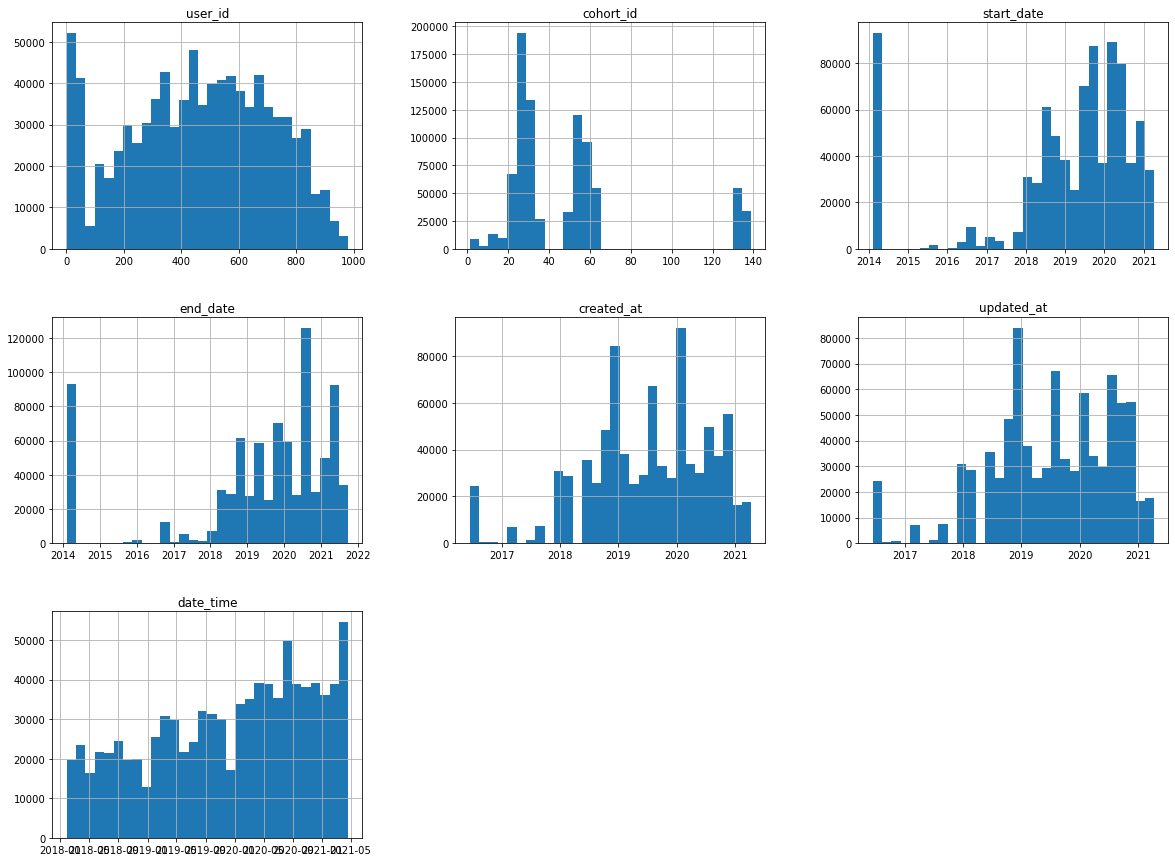

In [6]:
df.hist(bins=30, figsize=(20, 15))

In [7]:
df['path'].nunique()

2313

<AxesSubplot:>

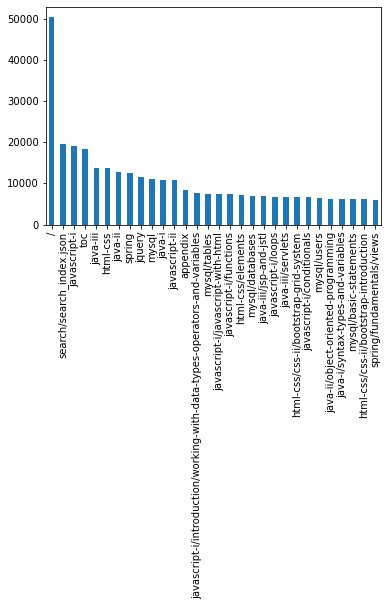

In [8]:
df['path'].value_counts()[:30].plot(kind='bar')

In [9]:
df.ip.nunique()

5531

<AxesSubplot:>

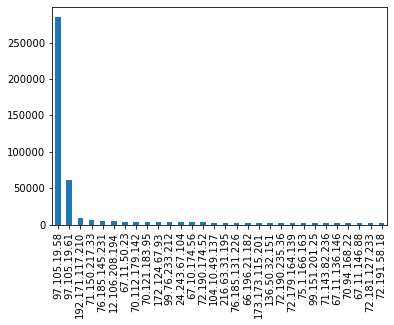

In [10]:
df['ip'].value_counts()[:30].plot(kind='bar')

note - interesting the one ip address and the second highest too. maybe the instructors share one often working from same comp? or could be a scraping thing. keep in mind

In [11]:
df.name.nunique()

47

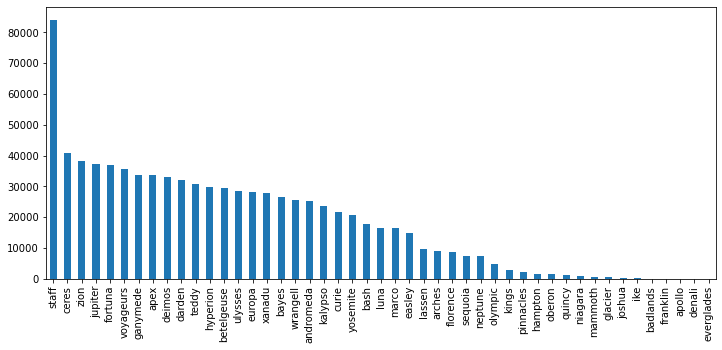

In [12]:
df['name'].value_counts()[:47].plot(kind='bar', figsize=(12,5))
plt.show()

In [13]:
#df['slack'] = df['slack'].str[1:]

In [14]:
#df.slack.value_counts()

In [15]:
#df['slack'] = df.slack.replace({'taff': 'staff'})

In [16]:
#df['slack'].value_counts()

In [17]:
#df['slack'].groupby(df.name).max()

In [18]:
#df.cohort_id.nunique()

In [19]:
#df['slack'].nunique(), df.name.nunique()

this is what's not right 

Bayes              staff

should be fine just using name as it's basically the same, but has bayes and staff

summary so far-
- datatypes for date time
- drop slack
- drop delete column
- drop the null values 
- should be about 850k records
- look at dtypes closely and make changes where desired (maybe name instead of number for a couple)
- maybe change name to cohort, lower case
- cohort id corresponds to name. do you need both? probably ok to keep both incase
- keep the couple very high counts ip addresses in mind
- talk with group about what they found and put in function


### Questions to keep in mind (5 should be answered very thoroughly. Could touch on all, but 5 min- for MVP)

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        900222 non-null  object        
 1   user_id     900223 non-null  int64         
 2   cohort_id   847330 non-null  float64       
 3   ip          900223 non-null  object        
 4   name        847330 non-null  object        
 5   start_date  847330 non-null  datetime64[ns]
 6   end_date    847330 non-null  datetime64[ns]
 7   created_at  847330 non-null  datetime64[ns]
 8   updated_at  847330 non-null  datetime64[ns]
 9   program_id  847330 non-null  object        
 10  date_time   900223 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(1), int64(1), object(4)
memory usage: 75.5+ MB


## Explore: Question 3 

### Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

### Initial thoughts about question:
- First, we are looking at only active students for this question. That means I am creating a df that has records where the date (date of access) falls is between (or on) start date and end date
- what could we find out about the students? 
    - difference in access of virtual vs. inperson?
    - what is "low access"- look at numbers here and %s. make some bins of average, low, very low, etc.
    - what cohort they are in? do students in certain cohorts tend to access a lot less? what about program?
    - could very low access be due to students dropping out of the program possibly?
    - do students access more, less, same early on? near graduation?
    - do the low access students have ip addresses local to SA, not local? appear to be remote or not? covid 19 impact on access?
    - else?

In [125]:
df3 = explore.explore_question3(df)

In [126]:
df3.info()
#look at df3 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647197 entries, 4 to 900217
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   path            647197 non-null  object        
 1   user_id         647197 non-null  object        
 2   ip              647197 non-null  object        
 3   cohort          647197 non-null  object        
 4   start_date      647197 non-null  datetime64[ns]
 5   end_date        647197 non-null  datetime64[ns]
 6   created_at      647197 non-null  datetime64[ns]
 7   updated_at      647197 non-null  datetime64[ns]
 8   program         647197 non-null  object        
 9   date_time       647197 non-null  datetime64[ns]
 10  program_access  647197 non-null  bool          
dtypes: bool(1), datetime64[ns](5), object(5)
memory usage: 54.9+ MB


<AxesSubplot:>

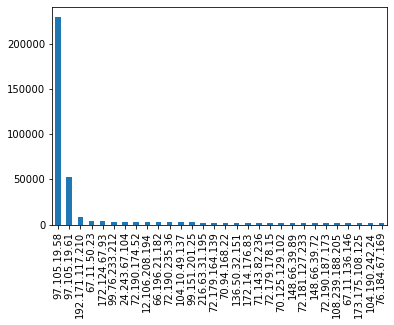

In [23]:
df3['ip'].value_counts()[:30].plot(kind='bar')

interesting that we still have those couple ip addresses that have a cra amount of access even though dropped staff and non-students. quick look to see what this could be about

In [24]:
df3['ip'].value_counts().head()

97.105.19.58       229087
97.105.19.61        52122
192.171.117.210      7984
67.11.50.23          4181
172.124.67.93        3488
Name: ip, dtype: int64

In [25]:
df3[df3['ip'] == '97.105.19.58'].groupby(df3.cohort).sum()

,program_access
cohort,
andromeda,16932
bayes,16899
betelgeuse,20761
ceres,26797
curie,5189
deimos,21483
europa,17470
fortuna,11888
ganymede,13


In [26]:
df3[df3['ip'] == '97.105.19.58'].groupby(df3.user_id).sum()

,program_access
user_id,
118,5
119,3
120,671
124,11
127,25
...,...
625,2
626,1
627,1


so we have 345 user ids that have used this ip address, some much more than others

In [27]:
df3[df3['user_id'] == 120].groupby(df3.ip).sum()
#all of the ip addresses from user 120

,program_access
ip,
104.15.38.22,30
104.190.255.78,69
104.48.213.175,687
192.171.117.210,100
70.123.135.83,18
70.123.137.196,64
72.128.136.219,4
72.177.116.71,3
72.179.136.146,3


OK, I'm thinking that this is the public IP address for codeup so we could potentially infer that these are inperson students. One more thought to see if that makes sense...

Also, this is what google says-

If you access the Internet from a local network (LAN) in your home or business, it is possible that you share an IP address with other users. This is because, while you might use different computers or devices, you all use the same Internet connection

If my theory is true, there'd be no access from that ip during a lot of covid time

In [28]:
df3[df3['ip'] == '97.105.19.58'].groupby(df3.date_time < '2020-03-15').sum()

,program_access
date_time,
False,485
True,228602


In [29]:
df3[df3['ip'] == '97.105.19.58'].groupby(df3.date_time < '2020-03-30').sum()

,program_access
date_time,
True,229087


ok, this ip address definitely stopped being used right at lock down time. let's look at the other

In [30]:
df3[df3['ip'] == '97.105.19.61'].groupby(df3.date_time < '2020-03-30').sum()

,program_access
date_time,
True,52122


In [31]:
df3[df3['ip'] == '192.171.117.210'].groupby(df3.date_time < '2020-03-30').sum()

,program_access
date_time,
False,394
True,7590


ok, right now, I don't have enough info to determine in person vs. virtual so potentially will come back to this idea, but those could ip addresses I can deteermine are at Codeup and went dead when the pandemic started. That's all I'll do w ip addresses right now

### What is "low access"

In [127]:
cohort_counts = df3.cohort.value_counts()
cohort_counts
#check to make sure no staff and lowest access

jupiter       36447
ceres         35766
zion          33842
fortuna       33397
voyageurs     32337
ganymede      29438
darden        28834
apex          28641
hyperion      28513
betelgeuse    25936
europa        25702
teddy         25280
deimos        24799
ulysses       24088
wrangell      24059
kalypso       23691
xanadu        22508
bayes         21813
andromeda     21114
yosemite      19255
curie         17943
luna          16623
marco         16397
bash          16371
easley        14715
florence       8562
neptune        7276
sequoia        2178
oberon         1672
Name: cohort, dtype: int64

notes: gives overview, but to be fair, this doesn't mean much without comparing this to the amount of students in that cohort. looking at that...

In [128]:
user_counts = df3.user_id.groupby(df3.cohort).nunique()
user_counts

cohort
andromeda     27
apex          21
bash          22
bayes         22
betelgeuse    20
ceres         29
curie         19
darden        28
deimos        25
easley        17
europa        28
florence      21
fortuna       28
ganymede      28
hyperion      23
jupiter       33
kalypso       23
luna          20
marco         31
neptune       37
oberon        26
sequoia       21
teddy         31
ulysses       28
voyageurs     33
wrangell      26
xanadu        20
yosemite      27
zion          25
Name: user_id, dtype: int64

In [34]:
user_counts = df3.user_id.groupby(df3.cohort).nunique()
round(cohort_counts/user_counts).sort_values()
#this is average active student access per cohort
#of course this does not show individual students yet that have low access, just overview by cohort

oberon          64.0
sequoia        104.0
neptune        197.0
florence       408.0
marco          529.0
yosemite       713.0
bash           744.0
andromeda      782.0
teddy          815.0
luna           831.0
ulysses        860.0
easley         866.0
europa         918.0
wrangell       925.0
curie          944.0
voyageurs      980.0
deimos         992.0
bayes          992.0
kalypso       1030.0
darden        1030.0
ganymede      1051.0
jupiter       1104.0
xanadu        1125.0
fortuna       1193.0
ceres         1233.0
hyperion      1240.0
betelgeuse    1297.0
zion          1354.0
apex          1364.0
dtype: float64

In [35]:
df3.cohort.groupby(df3.program).nunique()

program
data_science        5
full_stack_java    24
Name: cohort, dtype: int64

In [36]:
df3.cohort.groupby(df3.program == 'data_science').unique()

program
False    [teddy, sequoia, ulysses, voyageurs, wrangell,...
True              [bayes, curie, darden, easley, florence]
Name: cohort, dtype: object

In [37]:
def bar_color(df3,color1,color2):
    return np.where(df3.program == 'data_science' ,color1,color2)

<AxesSubplot:>

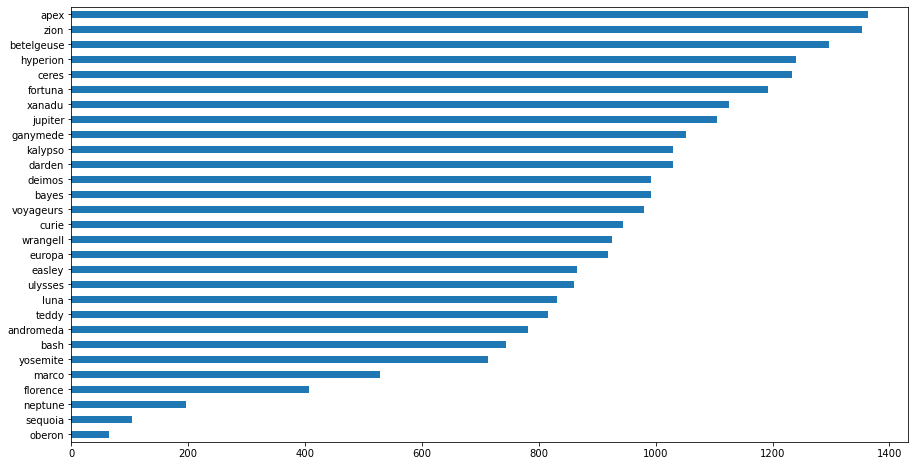

In [38]:
plt.figure(figsize=(15,8))
(df3.cohort.value_counts()/df3.user_id.groupby(df3.cohort).nunique()).sort_values(ascending=True).plot(kind='barh')

In [129]:
df3['cohort_program'] = df3['program'] + '_' + df3['cohort']

<AxesSubplot:>

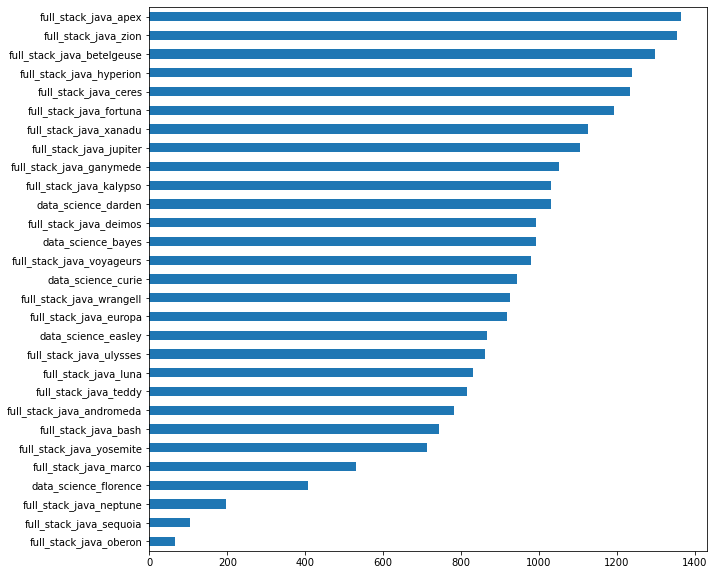

In [40]:
plt.figure(figsize=(10,10))
(df3.cohort_program.value_counts()/df3.user_id.groupby(df3.cohort_program).nunique()).sort_values(ascending=True).plot(kind='barh')

there are only 5 ds cohorts in the set compared to 24 java and ds is spread out here with averages so right now there isnt a super obvious trend with averages, but let's bin low access and see if those students tend to fall in certain programs. We can see here a couple cohorts had super low averages. any trend with them?

### binning-

In [130]:
counts = df3.user_id.value_counts()
#low = active[active['user_id'].isin(counts[counts < 100].index)]

In [42]:
df3.user_id.value_counts()

344    4763
570    4075
685    3223
671    3193
555    3086
       ... 
832       3
879       1
940       1
918       1
619       1
Name: user_id, Length: 731, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        900222 non-null  object        
 1   user_id     900223 non-null  int64         
 2   cohort_id   847330 non-null  float64       
 3   ip          900223 non-null  object        
 4   name        847330 non-null  object        
 5   start_date  847330 non-null  datetime64[ns]
 6   end_date    847330 non-null  datetime64[ns]
 7   created_at  847330 non-null  datetime64[ns]
 8   updated_at  847330 non-null  datetime64[ns]
 9   program_id  847330 non-null  object        
 10  date_time   900223 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(1), int64(1), object(4)
memory usage: 75.5+ MB


In [44]:
df3.groupby(df.user_id).sum()

,program_access
user_id,
2,1541
3,1514
4,692
5,1621
6,1311
...,...
976,29
977,86
978,55


In [45]:
counts.mean(), counts.min(), counts.max()

(885.358413132695, 1, 4763)

In [46]:
counts.quantile(.01)

6.3

In [47]:
counts.quantile(.05)

50.0

In [54]:
counts.quantile(.10)

115.0

<AxesSubplot:>

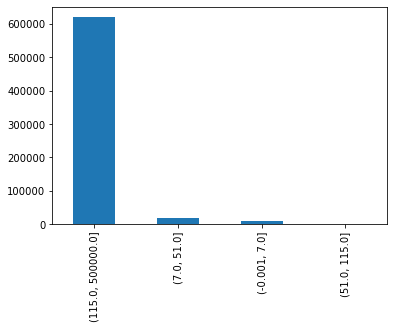

In [49]:
pd.cut(df3['user_id'], [0, 7 , 51 , 115, 500000], include_lowest=True).value_counts().plot(kind='bar')

In [131]:
bins = [0, 7, 51, 115, 50000000]
labels = ['bottom_1', 'bottom_1-5','bottom_5-10', 'not_bottom']
df3['bottom'] = pd.cut(df3['user_id'].value_counts(), bins=bins, labels=labels)

In [51]:
df3[df3.bottom == 'not_bottom']

,path,user_id,ip,cohort,start_date,end_date,created_at,updated_at,program,date_time,program_access,cohort_program,bottom
4,javascript-i/conditionals,2,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24,True,full_stack_java_teddy,not_bottom
5,javascript-i/loops,2,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:41,True,full_stack_java_teddy,not_bottom
6,javascript-i/conditionals,3,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:46,True,full_stack_java_teddy,not_bottom
7,javascript-i/functions,3,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:48,True,full_stack_java_teddy,not_bottom
8,javascript-i/loops,2,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:59,True,full_stack_java_teddy,not_bottom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,javascript-i/conditionals,6,104.53.201.99,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-28 21:46:51,True,full_stack_java_teddy,not_bottom
948,javascript-i/functions,6,104.53.201.99,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-28 21:46:57,True,full_stack_java_teddy,not_bottom
949,appendix/further-reading/javascript/hoisting.html,6,104.53.201.99,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-28 21:47:00,True,full_stack_java_teddy,not_bottom
950,appendix/further-reading/javascript/hoisting,6,104.53.201.99,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-28 21:47:06,True,full_stack_java_teddy,not_bottom


In [132]:
counts = df3.user_id.value_counts()
bottom_1 = df3[df3['user_id'].isin(counts[counts < 7].index)]
bottom_5 = df3[df3['user_id'].isin(counts[counts < 51].index)]
bottom_10 = df3[df3['user_id'].isin(counts[counts < 116].index)]

In [56]:
bottom_1.describe()

,path,user_id,ip,cohort,start_date,end_date,created_at,updated_at,program,date_time,program_access,cohort_program,bottom
count,22,22.0,22,22,22,22,22,22,22,22,22,22,0
unique,10,8.0,7,7,7,7,7,7,1,22,1,7,0
top,/,956.0,97.105.19.58,oberon,2021-04-12 00:00:00,2021-10-01 00:00:00,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2018-09-27 13:57:44,True,full_stack_java_oberon,NaN
freq,9,6.0,7,6,6,6,6,6,22,1,22,6,NaN
first,NaN,NaN,NaN,NaN,2018-05-29 00:00:00,2018-10-11 00:00:00,2018-05-25 22:25:57,2018-05-25 22:25:57,NaN,2018-09-27 13:57:44,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2021-04-12 00:00:00,2021-10-01 00:00:00,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2021-04-15 15:32:22,NaN,NaN,NaN


<AxesSubplot:xlabel='cohort_program', ylabel='count'>

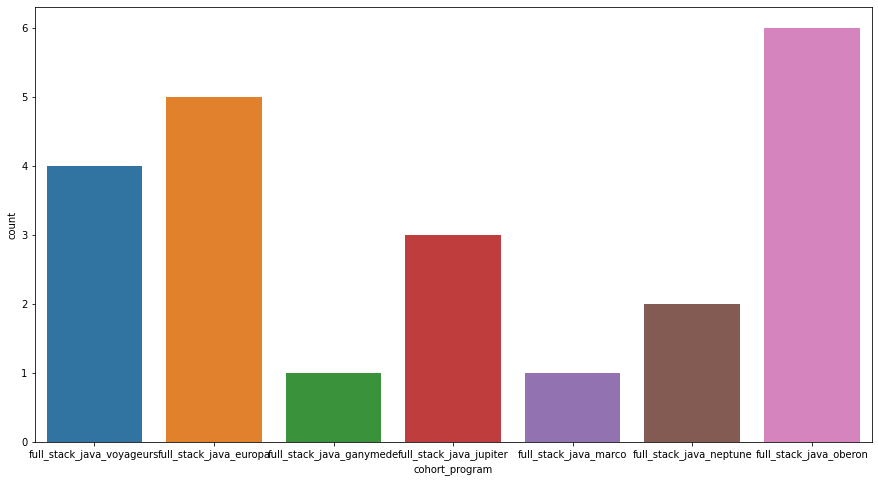

In [57]:
plt.figure(figsize=(15,8))
sns.countplot(bottom_1.cohort_program)

<AxesSubplot:xlabel='cohort_program', ylabel='count'>

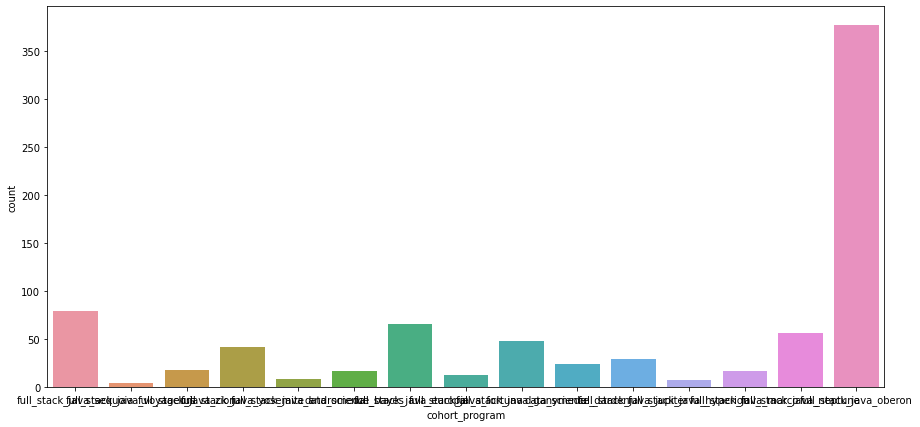

In [58]:
plt.figure(figsize=(15,7))
sns.countplot(bottom_5.cohort_program)

In [60]:
bottom_10.cohort_program.value_counts()

full_stack_java_oberon       1258
full_stack_java_sequoia       759
full_stack_java_voyageurs     388
full_stack_java_neptune       280
full_stack_java_andromeda     217
full_stack_java_bash          185
full_stack_java_teddy         133
full_stack_java_zion          128
full_stack_java_jupiter       117
full_stack_java_ulysses       112
data_science_easley            92
full_stack_java_europa         66
full_stack_java_kalypso        63
full_stack_java_ceres          53
full_stack_java_ganymede       48
full_stack_java_yosemite       42
data_science_darden            24
data_science_bayes             17
full_stack_java_marco          17
full_stack_java_fortuna        12
full_stack_java_hyperion        7
Name: cohort_program, dtype: int64

<AxesSubplot:xlabel='cohort_program', ylabel='count'>

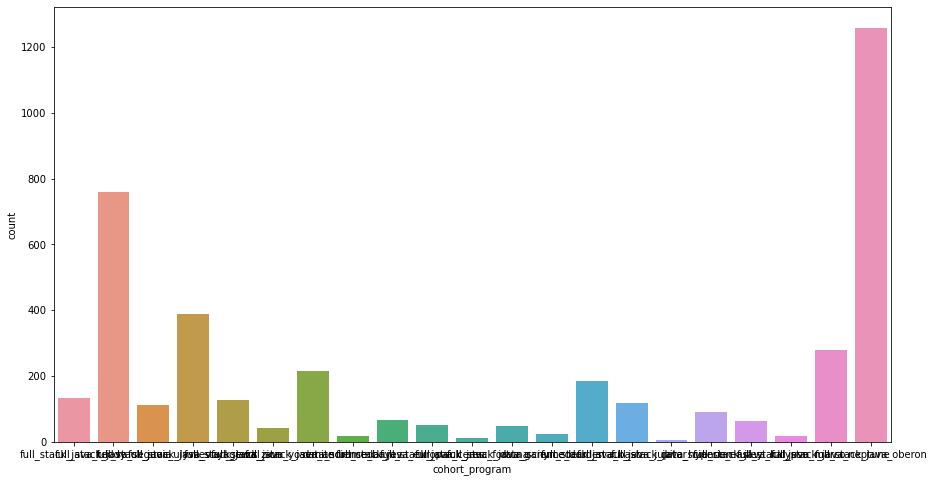

In [59]:
plt.figure(figsize=(15,8))
sns.countplot(bottom_10.cohort_program)

In [61]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647197 entries, 4 to 900217
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   path            647197 non-null  object        
 1   user_id         647197 non-null  object        
 2   ip              647197 non-null  object        
 3   cohort          647197 non-null  object        
 4   start_date      647197 non-null  datetime64[ns]
 5   end_date        647197 non-null  datetime64[ns]
 6   created_at      647197 non-null  datetime64[ns]
 7   updated_at      647197 non-null  datetime64[ns]
 8   program         647197 non-null  object        
 9   date_time       647197 non-null  datetime64[ns]
 10  program_access  647197 non-null  bool          
 11  cohort_program  647197 non-null  object        
 12  bottom          608 non-null     category      
dtypes: bool(1), category(1), datetime64[ns](5), object(6)
memory usage: 76.6+ MB


In [62]:
bottom_1[['start_date', 'end_date', 'date_time']]

,start_date,end_date,date_time
131699,2018-05-29,2018-10-11,2018-09-27 13:57:44
131788,2018-05-29,2018-10-11,2018-09-27 14:47:37
131802,2018-05-29,2018-10-11,2018-09-27 14:58:48
131804,2018-05-29,2018-10-11,2018-09-27 14:59:07
388308,2019-11-04,2020-04-17,2019-11-04 16:19:26
388309,2019-11-04,2020-04-17,2019-11-04 16:19:34
388399,2019-11-04,2020-04-17,2019-11-04 16:54:02
388405,2019-11-04,2020-04-17,2019-11-04 16:54:38
388407,2019-11-04,2020-04-17,2019-11-04 16:54:45
491139,2020-03-23,2020-08-20,2020-03-23 14:10:17


In [63]:
bottom_1['month_start'] = bottom_1.start_date.dt.month
bottom_1['month_access'] = bottom_1.date_time.dt.month

<AxesSubplot:xlabel='month_start', ylabel='month_access'>

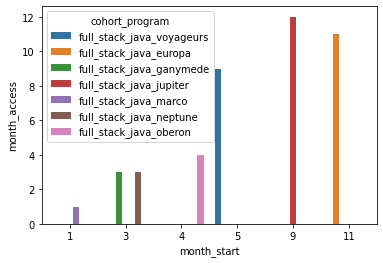

In [64]:
sns.barplot(x='month_start', y='month_access', data=bottom_1, hue='cohort_program')

notes: for bottom 1%, most access seems to be in first month of program for those that started in jan feb march april, nov

<AxesSubplot:xlabel='month_start', ylabel='month_access'>

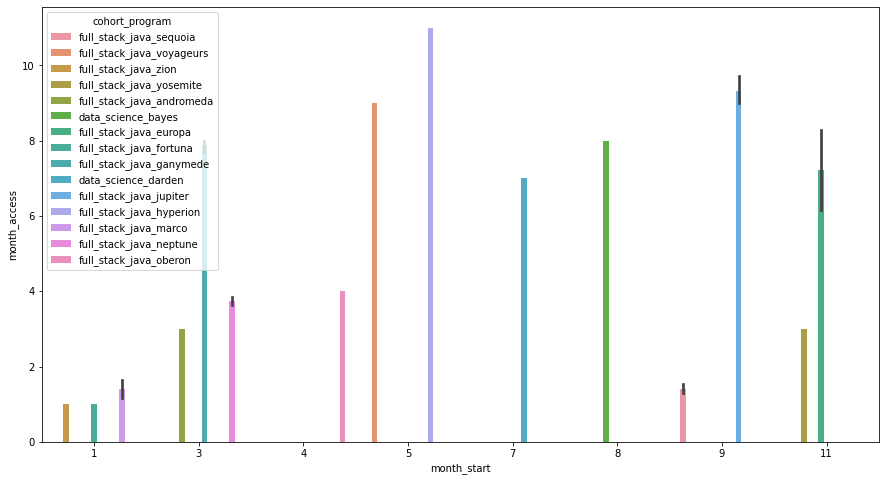

In [65]:
plt.figure(figsize=(15,8))
bottom_5['month_start'] = bottom_5.start_date.dt.month
bottom_5['month_access'] = bottom_5.date_time.dt.month
sns.barplot(x='month_start', y='month_access', data=bottom_5, hue='cohort_program')

<AxesSubplot:xlabel='month_start', ylabel='month_access'>

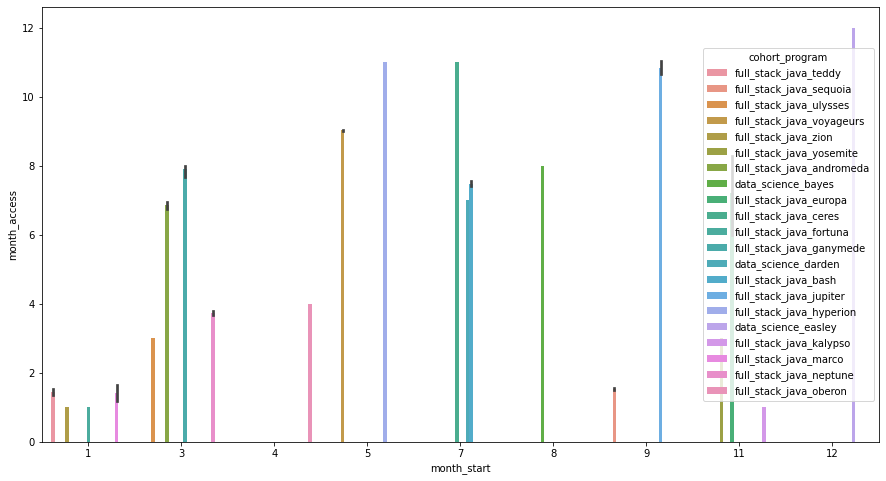

In [66]:
plt.figure(figsize=(15,8))
bottom_10['month_start'] = bottom_10.start_date.dt.month
bottom_10['month_access'] = bottom_10.date_time.dt.month
sns.barplot(x='month_start', y='month_access', data=bottom_10, hue='cohort_program')

summary- 
have identified cohorts with an average lower access
very low access tends to be most present in accessing near the beginning of the course. could be to drop out?

In [67]:
bottom_1[['cohort', 'start_date']].value_counts()

cohort     start_date
oberon     2021-04-12    6
europa     2019-11-04    5
voyageurs  2018-05-29    4
jupiter    2020-09-21    3
neptune    2021-03-15    2
ganymede   2020-03-23    1
marco      2021-01-25    1
dtype: int64

In [68]:
bottom_5[['cohort', 'start_date']].value_counts()

cohort     start_date
oberon     2021-04-12    378
sequoia    2017-09-27     79
europa     2019-11-04     66
neptune    2021-03-15     56
ganymede   2020-03-23     48
yosemite   2018-11-05     42
jupiter    2020-09-21     29
darden     2020-07-13     24
zion       2019-01-22     18
bayes      2019-08-19     17
marco      2021-01-25     17
fortuna    2020-01-13     12
andromeda  2019-03-18      8
hyperion   2020-05-26      7
voyageurs  2018-05-29      4
dtype: int64

oberon clearly had lowest access. anything going on then that could affect access? covid? anything else? does not look like there is anything clear with when then program happened that would impact 

In [69]:
bottom_10[['cohort_program', 'start_date']].value_counts()

cohort_program             start_date
full_stack_java_oberon     2021-04-12    1258
full_stack_java_sequoia    2017-09-27     759
full_stack_java_voyageurs  2018-05-29     388
full_stack_java_neptune    2021-03-15     280
full_stack_java_andromeda  2019-03-18     217
full_stack_java_bash       2020-07-20     185
full_stack_java_teddy      2018-01-08     133
full_stack_java_zion       2019-01-22     128
full_stack_java_jupiter    2020-09-21     117
full_stack_java_ulysses    2018-03-05     112
data_science_easley        2020-12-07      92
full_stack_java_europa     2019-11-04      66
full_stack_java_kalypso    2020-11-02      63
full_stack_java_ceres      2019-07-15      53
full_stack_java_ganymede   2020-03-23      48
full_stack_java_yosemite   2018-11-05      42
data_science_darden        2020-07-13      24
full_stack_java_marco      2021-01-25      17
data_science_bayes         2019-08-19      17
full_stack_java_fortuna    2020-01-13      12
full_stack_java_hyperion   2020-05-26     

- possibly theory! I heard that the VA ran out of funding in june of 2021. when I started the program I was conditional that my funding would be approved by VETTEC. Is there a possible that VETTEC turned away students after starting? anything else to explore that possibility?

- what else can we learn about students- have covered cohorts, programs, month of access for low access... next maybe look into ip address and see if there are any trends there. need to keep in mind that ip address looks questionable based on change with covid, but possibly something there. also, for students with low access, look at their last access date

<AxesSubplot:xlabel='user_id'>

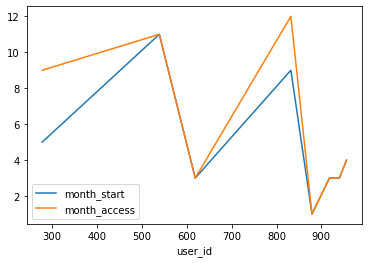

In [70]:
bottom_1[['month_start', 'month_access']].groupby(bottom_1.user_id).max().plot()

<AxesSubplot:xlabel='user_id'>

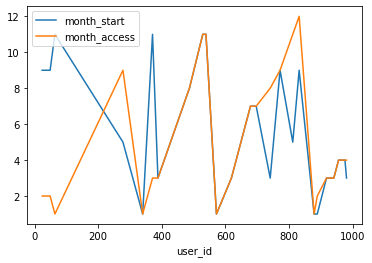

In [71]:
bottom_5[['month_start', 'month_access']].groupby(bottom_5.user_id).max().plot()

<AxesSubplot:xlabel='user_id'>

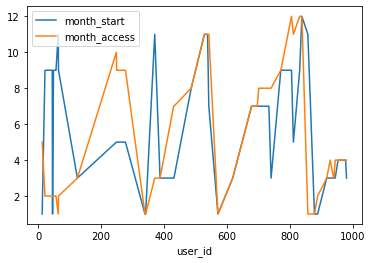

In [72]:
bottom_10[['month_start', 'month_access']].groupby(bottom_10.user_id).max().plot()
#look at it the difference

In [ ]:
#bigger class?

In [76]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647197 entries, 4 to 900217
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   path            647197 non-null  object        
 1   user_id         647197 non-null  object        
 2   ip              647197 non-null  object        
 3   cohort          647197 non-null  object        
 4   start_date      647197 non-null  datetime64[ns]
 5   end_date        647197 non-null  datetime64[ns]
 6   created_at      647197 non-null  datetime64[ns]
 7   updated_at      647197 non-null  datetime64[ns]
 8   program         647197 non-null  object        
 9   date_time       647197 non-null  datetime64[ns]
 10  program_access  647197 non-null  bool          
 11  cohort_program  647197 non-null  object        
 12  bottom          608 non-null     category      
dtypes: bool(1), category(1), datetime64[ns](5), object(6)
memory usage: 76.6+ MB


In [93]:
df3[['start_date', 'date_time']].groupby(df3.cohort).mean()

,start_date,date_time
cohort,,
andromeda,2019-03-18 00:00:00.000000000,2019-05-14 07:13:19.230510592
apex,2020-02-24 00:00:00.000000000,2020-05-09 22:11:52.664606720
bash,2020-07-20 00:00:00.000000000,2020-10-06 03:03:41.931403008
bayes,2019-08-19 00:00:00.000000000,2019-10-22 00:48:36.002063104
betelgeuse,2019-05-27 23:59:59.999999744,2019-07-23 08:19:23.883983872
ceres,2019-07-15 00:00:00.000000000,2019-09-14 17:18:07.229296128
curie,2020-02-03 00:00:00.000000000,2020-04-03 03:30:19.593713664
darden,2020-07-13 00:00:00.000000000,2020-09-19 12:52:54.775681536
deimos,2019-09-16 00:00:00.000000000,2019-11-29 11:52:21.877575680


- florence	2021-03-15 00:00:00.000000000	2021-03-28 11:55:21.973837824
- jupiter	2020-09-21 00:00:00.000000000	2020-12-17 09:33:19.657173504
- neptune	2021-03-15 00:00:00.000000000	2021-04-03 22:06:50.208356096
- oberon	2021-04-12 00:00:00.000000000	2021-04-17 08:01:01.693779968
- sequoia	2017-09-27 00:00:00.000000000	2018-02-02 15:45:54.817263360

- oberson and neptune, makes sense
- seq something weird! #this is bc the dt records didnt start til jan 2018
- jupiter sort of makes sense and florence

- all of the low access cohorts were during all virtual, except seq
- another possibility about oberon

In [133]:
user_counts = df3.user_id.groupby(df3.cohort).nunique()
round(cohort_counts/user_counts).sort_values()

oberon          64.0
sequoia        104.0
neptune        197.0
florence       408.0
marco          529.0
yosemite       713.0
bash           744.0
andromeda      782.0
teddy          815.0
luna           831.0
ulysses        860.0
easley         866.0
europa         918.0
wrangell       925.0
curie          944.0
voyageurs      980.0
deimos         992.0
bayes          992.0
kalypso       1030.0
darden        1030.0
ganymede      1051.0
jupiter       1104.0
xanadu        1125.0
fortuna       1193.0
ceres         1233.0
hyperion      1240.0
betelgeuse    1297.0
zion          1354.0
apex          1364.0
dtype: float64

In [96]:
df3 = df.set_index('date_time').sort_index()
df3

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
date_time,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java
...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,jquery/personal-site,64,28.0,71.150.217.33,staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java
2021-04-21 16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java
2021-04-21 16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java


In [99]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        900222 non-null  object        
 1   user_id     900223 non-null  int64         
 2   cohort_id   847330 non-null  float64       
 3   ip          900223 non-null  object        
 4   name        847330 non-null  object        
 5   start_date  847330 non-null  datetime64[ns]
 6   end_date    847330 non-null  datetime64[ns]
 7   created_at  847330 non-null  datetime64[ns]
 8   updated_at  847330 non-null  datetime64[ns]
 9   program_id  847330 non-null  object        
dtypes: datetime64[ns](4), float64(1), int64(1), object(4)
memory usage: 75.5+ MB


<AxesSubplot:xlabel='date_time'>

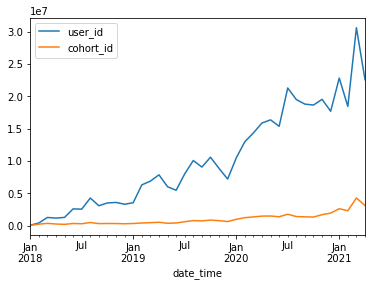

In [105]:
df3 = df.set_index('date_time').sort_index()
df3
df3.resample('M').sum().plot()

<AxesSubplot:xlabel='date_time'>

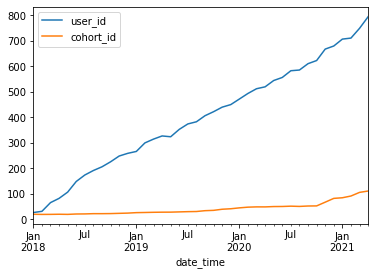

In [106]:
df3.resample('M').mean().plot()

<AxesSubplot:xlabel='date_time'>

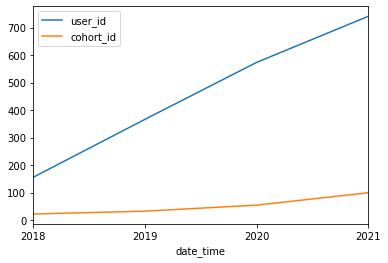

In [107]:
df3.resample('Y').mean().plot()

<AxesSubplot:xlabel='date_time'>

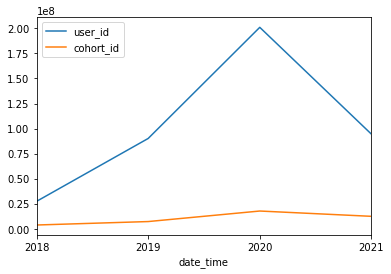

In [108]:
df3.resample('Y').sum().plot()

In [124]:
df3

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,grad_diff
date_time,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,-721 days +14:04:57
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,-721 days +14:03:58
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,-721 days +14:03:55
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,-721 days +14:03:54
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,110 days 14:03:36
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,jquery/personal-site,64,28.0,71.150.217.33,staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java,-2634 days +07:18:09
2021-04-21 16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java,-2634 days +07:17:58
2021-04-21 16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java,-2634 days +07:17:51


In [146]:
df3 = explore.explore_question3(df)

In [174]:
students = df3[['start_date', 'end_date', 'cohort', 'date_time']].groupby(df3.user_id).max()

In [153]:
students

,start_date,end_date,cohort,date_time
user_id,,,,
2,2018-01-08,2018-05-17,teddy,2018-05-10 18:25:38
3,2018-01-08,2018-05-17,teddy,2018-05-14 15:17:24
4,2018-01-08,2018-05-17,teddy,2018-03-27 14:28:18
5,2018-01-08,2018-05-17,teddy,2018-05-11 01:07:17
6,2018-01-08,2018-05-17,teddy,2018-05-14 14:33:42
...,...,...,...,...
976,2021-04-12,2021-10-01,oberon,2021-04-21 10:25:09
977,2021-04-12,2021-10-01,oberon,2021-04-21 09:46:37
978,2021-04-12,2021-10-01,oberon,2021-04-21 10:21:40


In [154]:
students['grad_diff'] = (students.end_date - students.date_time)
students.tail(10)

,start_date,end_date,cohort,date_time,grad_diff
user_id,,,,,
971,2021-04-12,2021-10-01,oberon,2021-04-20 11:42:09,163 days 12:17:51
972,2021-04-12,2021-10-01,oberon,2021-04-21 10:42:27,162 days 13:17:33
973,2021-04-12,2021-10-01,oberon,2021-04-21 10:26:14,162 days 13:33:46
974,2021-04-12,2021-10-01,oberon,2021-04-20 18:18:35,163 days 05:41:25
975,2021-04-12,2021-10-01,oberon,2021-04-21 10:19:32,162 days 13:40:28
976,2021-04-12,2021-10-01,oberon,2021-04-21 10:25:09,162 days 13:34:51
977,2021-04-12,2021-10-01,oberon,2021-04-21 09:46:37,162 days 14:13:23
978,2021-04-12,2021-10-01,oberon,2021-04-21 10:21:40,162 days 13:38:20
979,2021-04-12,2021-10-01,oberon,2021-04-21 10:53:46,162 days 13:06:14


In [156]:
students['grad_diff'].min()

Timedelta('0 days 00:10:06')

<AxesSubplot:xlabel='user_id'>

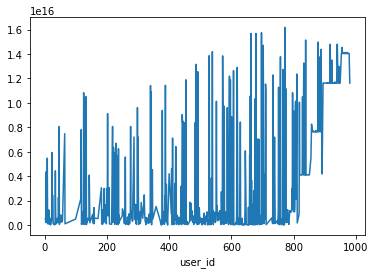

In [157]:
students['grad_diff'].plot()

In [162]:
students['grad_diff'].groupby(students.cohort).mean()

cohort
andromeda     16 days 14:39:05.777777777
apex                    30 days 13:03:40
bash          42 days 00:58:54.666666666
bayes         18 days 13:40:12.090909091
betelgeuse       19 days 02:16:17.050000
ceres         24 days 15:45:05.689655172
curie         16 days 23:18:04.736842105
darden        36 days 20:09:43.777777778
deimos           10 days 03:55:21.120000
easley        55 days 00:37:36.647058824
europa        20 days 08:47:53.333333333
florence        134 days 13:49:28.300000
fortuna       18 days 01:29:31.444444444
ganymede                14 days 09:41:18
hyperion      21 days 07:19:10.272727272
jupiter          33 days 04:41:15.750000
kalypso       43 days 15:59:10.652173913
luna             71 days 01:06:23.200000
marco         96 days 19:10:46.967741935
neptune      139 days 02:34:29.108108108
oberon       163 days 00:27:29.384615384
sequoia        3 days 16:06:00.476190476
teddy         15 days 09:35:48.966666666
ulysses       28 days 18:04:47.464285714
voyageurs

In [172]:
students['grad_diff'].groupby(students.cohort).min()

cohort
andromeda      0 days 00:10:06
apex           0 days 05:03:55
bash           0 days 08:06:59
bayes          0 days 10:24:40
betelgeuse     0 days 09:06:11
ceres          0 days 08:21:07
curie          0 days 10:00:27
darden         0 days 08:20:34
deimos         0 days 07:28:46
easley        47 days 07:27:10
europa         0 days 03:50:45
florence     134 days 10:36:54
fortuna        0 days 01:53:13
ganymede       0 days 00:53:00
hyperion       0 days 02:22:56
jupiter        0 days 00:30:20
kalypso       12 days 07:27:24
luna          47 days 07:21:46
marco         88 days 07:18:09
neptune      134 days 07:23:26
oberon       162 days 10:45:50
sequoia        0 days 12:25:45
teddy          0 days 02:41:43
ulysses        0 days 09:35:50
voyageurs      0 days 16:05:03
wrangell       0 days 09:26:54
xanadu         0 days 07:15:50
yosemite       0 days 13:41:03
zion           0 days 08:15:50
Name: grad_diff, dtype: timedelta64[ns]

ok, there must be something going on why these cohorts didn't have any access later in the program. this has got to be something else.

In [305]:
df3[df3.cohort == 'kalypso'].date_time.max()

Timestamp('2021-04-21 16:32:36')

In [319]:
df3.drop(df3[df3.cohort.isin(['easley', 'florence', 'neptune',  'sequoia', 'oberon', 'luna', 'marco'])].index, inplace=True)

In [306]:
#df3[df3.cohort == 'kalypso'].groupby(df3.date_time).max()

,path,user_id,ip,cohort,start_date,end_date,created_at,updated_at,program,date_time,program_access,grad_diff,diff,days
date_time,,,,,,,,,,,,,,
2020-11-03 09:06:55,/,788,173.175.108.125,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2020-11-03 09:06:55,True,NaT,183 days,181 days 14:53:05
2020-11-03 09:07:00,html-css,788,173.175.108.125,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2020-11-03 09:07:00,True,NaT,183 days,181 days 14:53:00
2020-11-03 09:07:05,html-css/introduction,788,173.175.108.125,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2020-11-03 09:07:05,True,NaT,183 days,181 days 14:52:55
2020-11-03 09:07:06,/,789,130.45.76.131,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2020-11-03 09:07:06,True,NaT,183 days,181 days 14:52:54
2020-11-03 09:07:15,javascript-i,788,173.175.108.125,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2020-11-03 09:07:15,True,NaT,183 days,181 days 14:52:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 15:25:19,java-iii,793,72.201.107.178,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2021-04-21 15:25:19,True,NaT,183 days,12 days 08:34:41
2021-04-21 15:25:23,mysql,793,72.201.107.178,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2021-04-21 15:25:23,True,NaT,183 days,12 days 08:34:37
2021-04-21 15:25:26,mysql/relationships/joins,793,72.201.107.178,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2021-04-21 15:25:26,True,NaT,183 days,12 days 08:34:34


In [185]:
#df[df.name == 'oberon'].groupby(df.user_id).max()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
user_id,,,,,,,,,,,
954,toc,954,139.0,72.177.209.77,oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-21 10:13:02
955,toc,955,139.0,70.121.220.245,oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-21 10:29:58
956,toc,956,139.0,162.200.114.251,oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-15 15:32:22
957,toc,957,139.0,76.185.197.205,oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-21 10:28:26
958,toc,958,139.0,69.239.143.192,oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-21 10:35:35
959,toc,959,139.0,96.8.168.216,oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-20 21:08:32
960,javascript-i/testing-user-functions,960,139.0,75.31.192.132,oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-21 09:56:59
961,toc,961,139.0,72.183.145.159,oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-20 12:04:53
962,toc,962,139.0,99.186.6.129,oberon,2021-04-12,2021-10-01,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2021-04-20 16:28:32


In [320]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579774 entries, 4 to 900201
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype          
---  ------          --------------   -----          
 0   path            579774 non-null  object         
 1   user_id         579774 non-null  object         
 2   ip              579774 non-null  object         
 3   cohort          579774 non-null  object         
 4   start_date      579774 non-null  datetime64[ns] 
 5   end_date        579774 non-null  datetime64[ns] 
 6   created_at      579774 non-null  datetime64[ns] 
 7   updated_at      579774 non-null  datetime64[ns] 
 8   program         579774 non-null  object         
 9   date_time       579774 non-null  datetime64[ns] 
 10  program_access  579774 non-null  bool           
 11  grad_diff       347 non-null     timedelta64[ns]
 12  diff            579774 non-null  timedelta64[ns]
 13  days            579774 non-null  timedelta64[ns]
dtypes: bool(1), datetime

In [323]:
df3 = df3.drop(columns=['grad_diff', 'diff'])

In [374]:
df3['days'] = df.date_time - df.start_date 

In [262]:
# df3['days'] = pd.cut(df3.days, bins=4, labels=['q1', 'q2', 'q3', 'q4'], 
#                         include_lowest=True)

In [375]:
cohort_df3 = []
unique_cohorts = set(list(df3['cohort']))
for cohort in unique_cohorts:
  cohort_df3.append(df3.loc[df3['cohort'] == cohort,:])

# this is the first dataframe of the list.
cohort_df3[3]

,path,user_id,ip,cohort,start_date,end_date,created_at,updated_at,program,date_time,program_access,days
326053,/,466,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:58,True,1 days 09:39:58
326054,/,467,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:59,True,1 days 09:39:59
326055,/,468,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:59,True,1 days 09:39:59
326056,/,469,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:40:02,True,1 days 09:40:02
326057,/,470,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:40:08,True,1 days 09:40:08
...,...,...,...,...,...,...,...,...,...,...,...,...
440529,6-regression/7.0-model,479,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2020-01-28 08:59:16,True,162 days 08:59:16
440530,7-classification/6.2-decision-trees,479,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2020-01-28 08:59:27,True,162 days 08:59:27
440531,7-classification/6.1-logistic-regression,479,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2020-01-28 08:59:35,True,162 days 08:59:35
440532,7-classification/4-explore,479,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2020-01-28 08:59:41,True,162 days 08:59:41


In [376]:
df3.days.value_counts()

40 days 22:52:09     30
40 days 22:52:07     30
40 days 22:52:08     25
40 days 22:52:10     25
40 days 22:52:11     25
                     ..
8 days 10:15:33       1
8 days 10:15:28       1
8 days 10:15:19       1
79 days 10:14:12      1
170 days 16:32:36     1
Name: days, Length: 530122, dtype: int64

In [289]:
cohort_df3[5].days.max()

Timedelta('171 days 07:15:43')

In [378]:
x = range(0, 22)

for i in x:
    cohort_df3[i]['quarters'] = pd.cut(cohort_df3[i].days, 4, labels=['q1','q2', 'q3', 'q4'])

In [379]:
cohort_df3[5].date_time.groupby(cohort_df3[5]['quarters']).min()

quarters
q1   2019-09-16 15:45:32
q2   2019-10-27 13:02:10
q3   2019-12-07 11:58:22
q4   2020-01-16 22:37:07
Name: date_time, dtype: datetime64[ns]

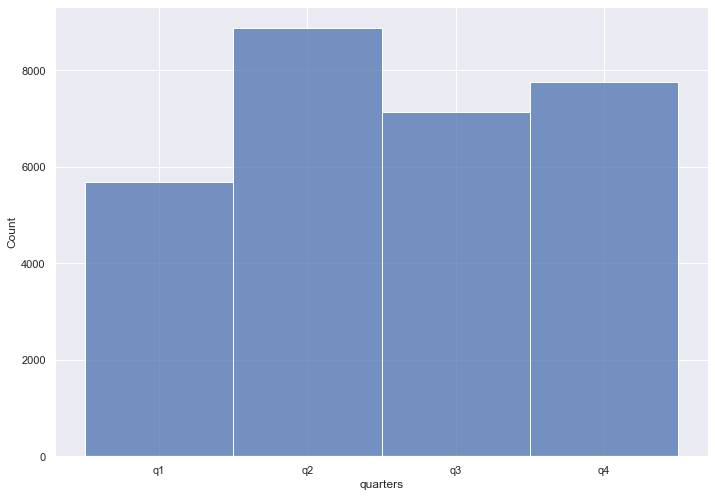

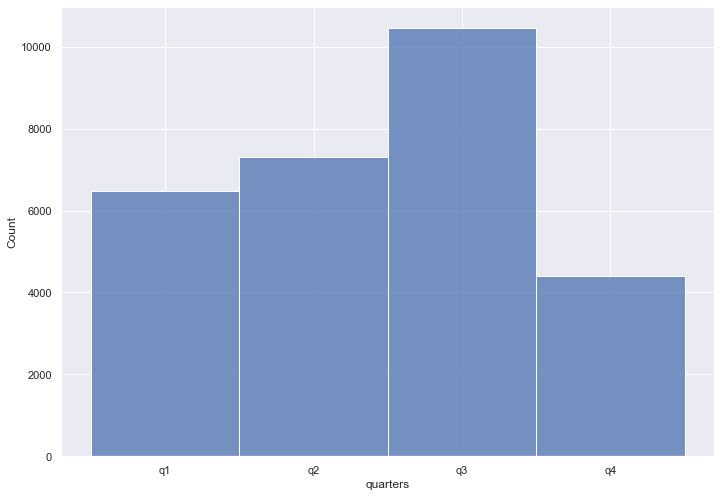

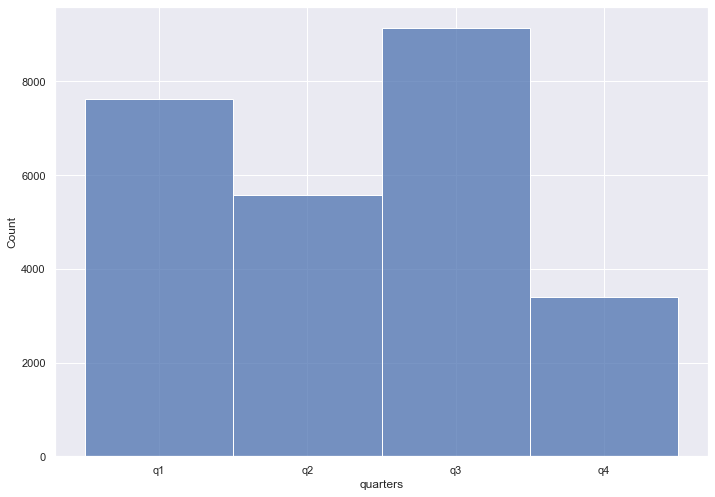

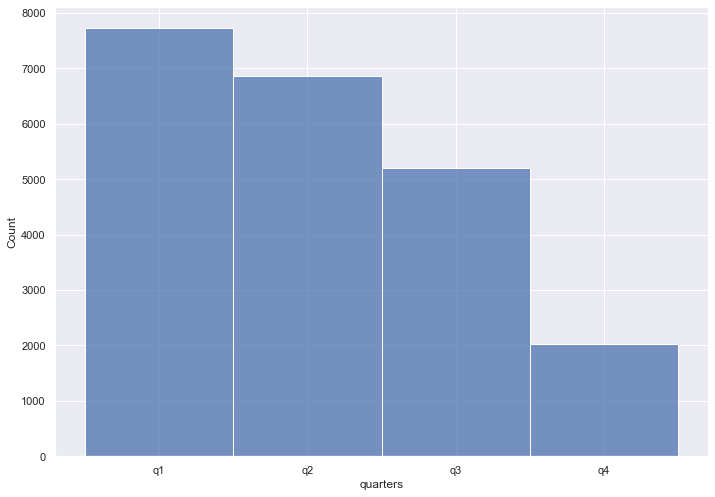

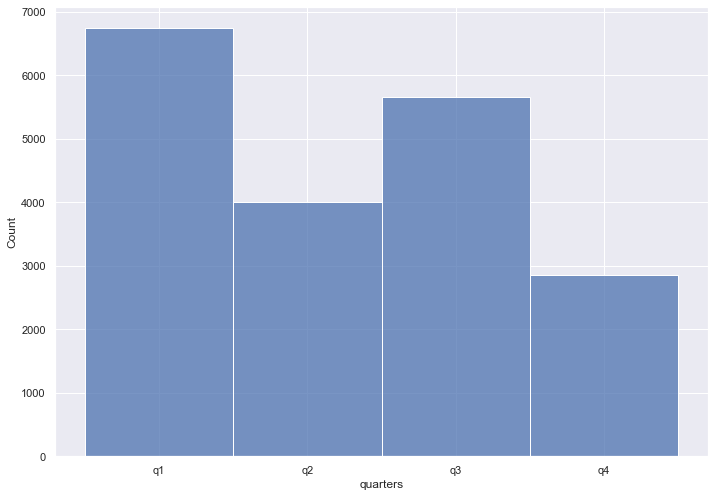

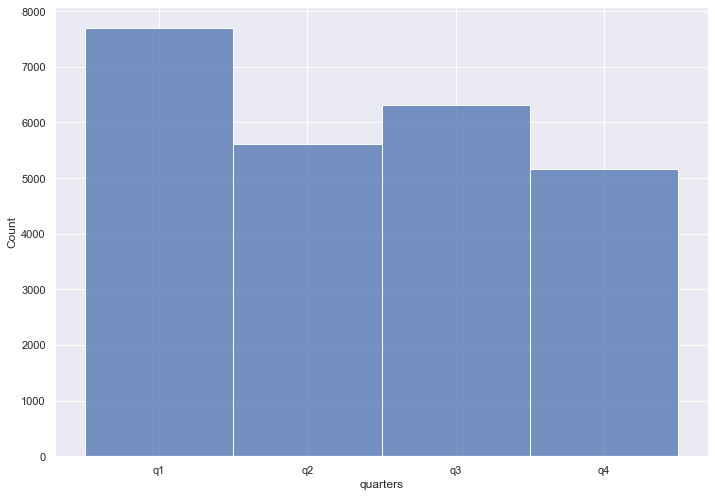

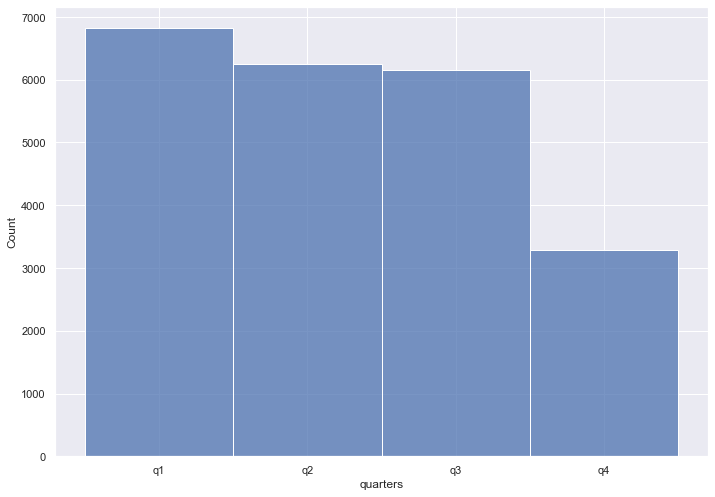

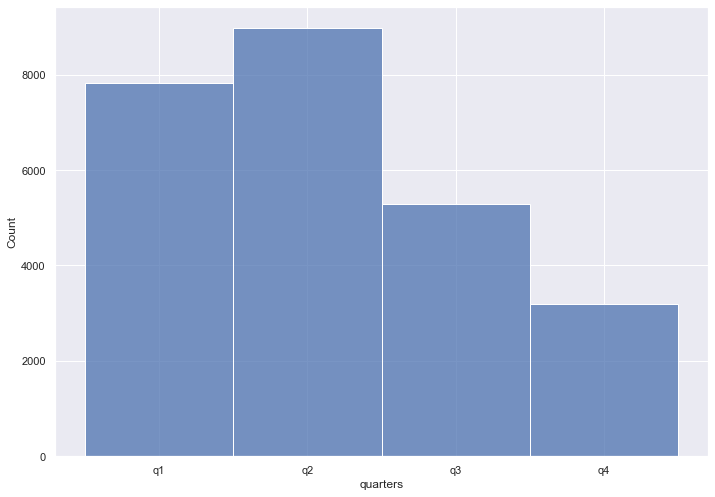

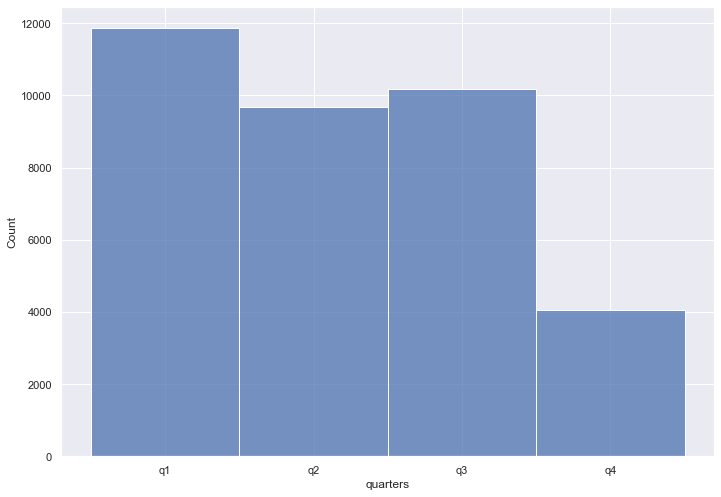

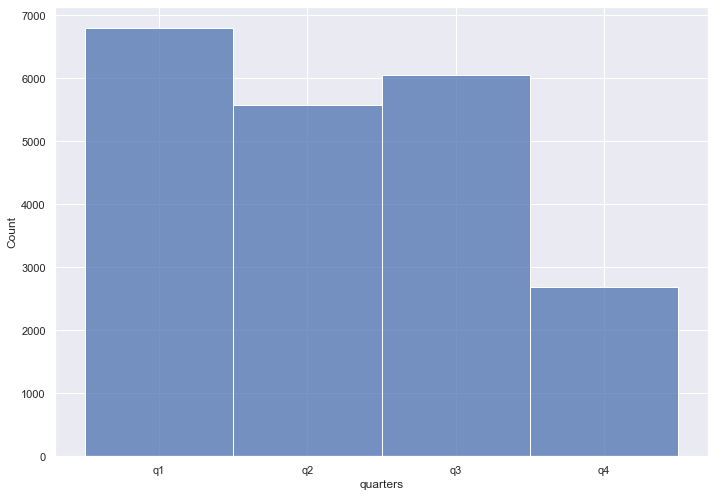

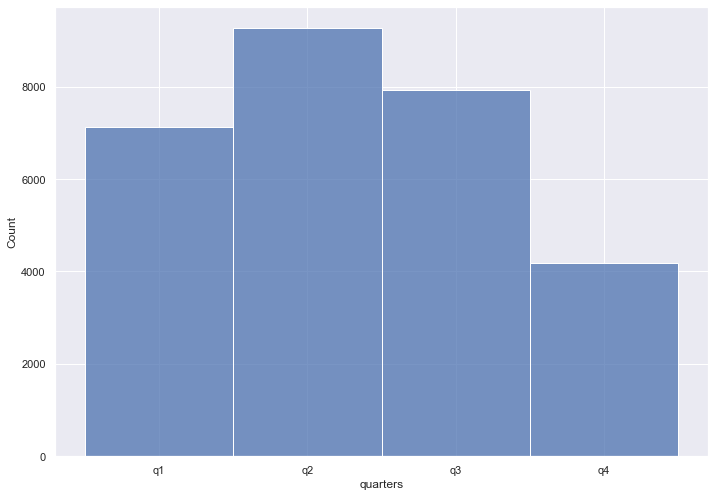

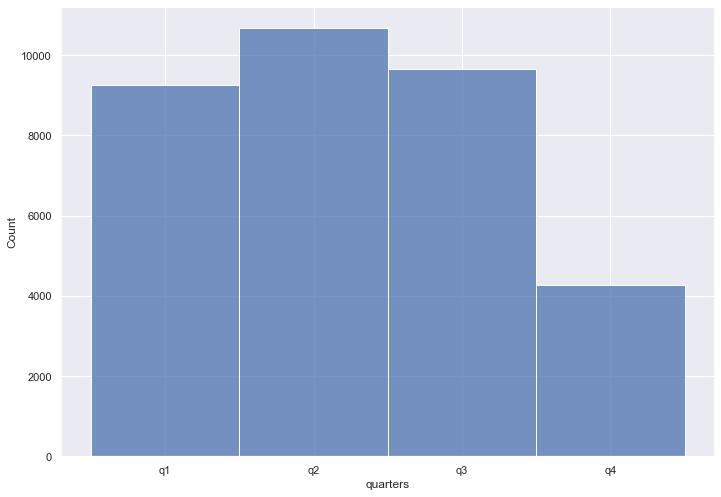

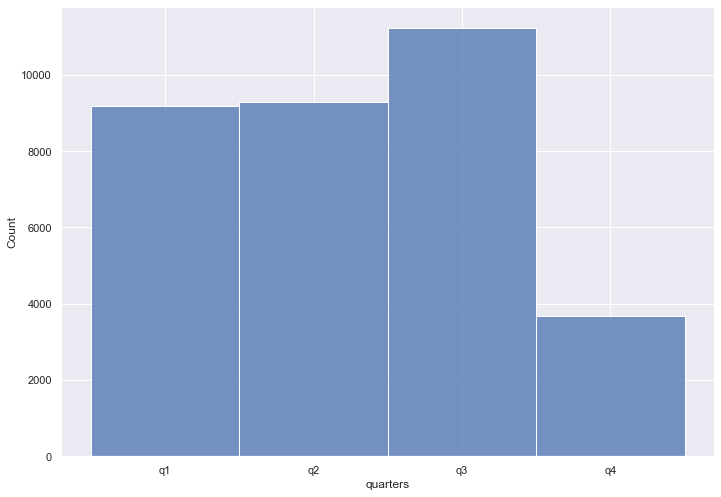

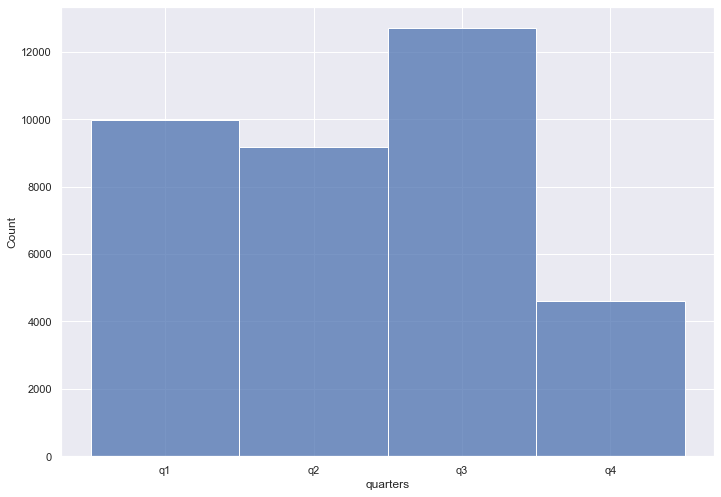

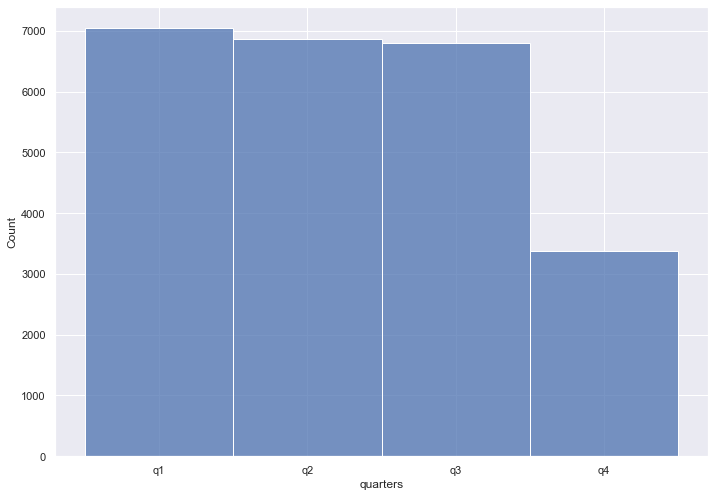

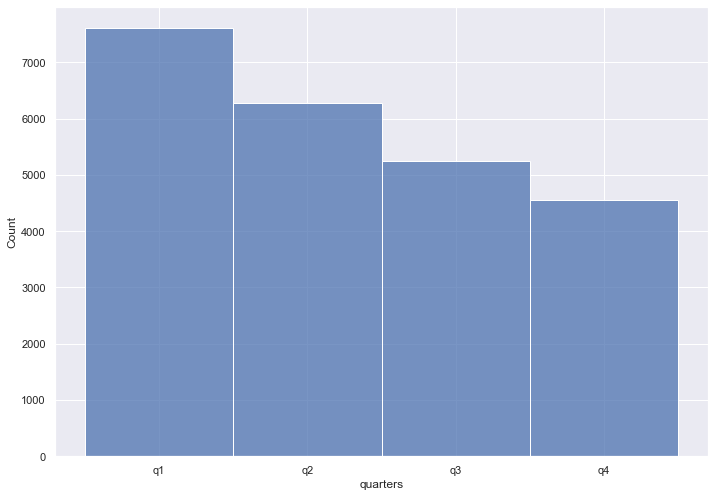

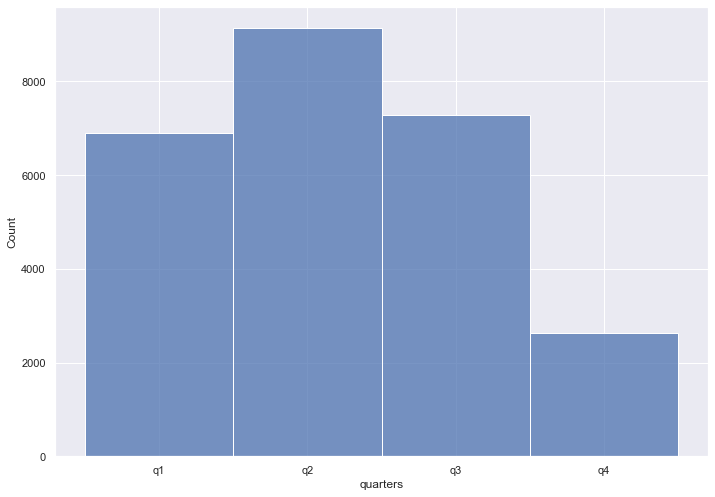

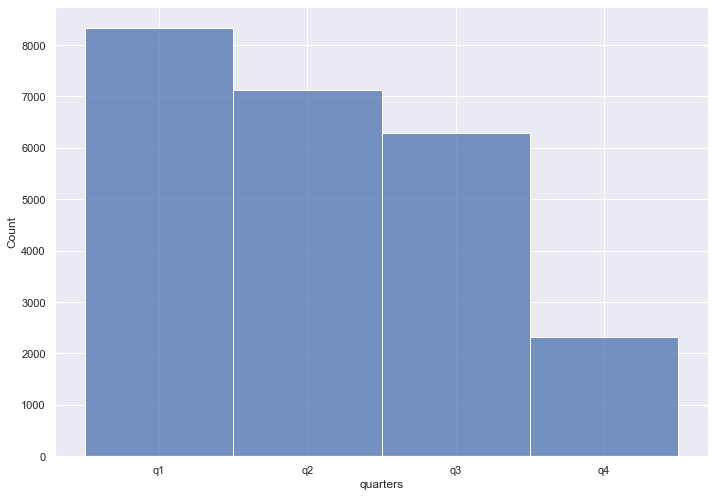

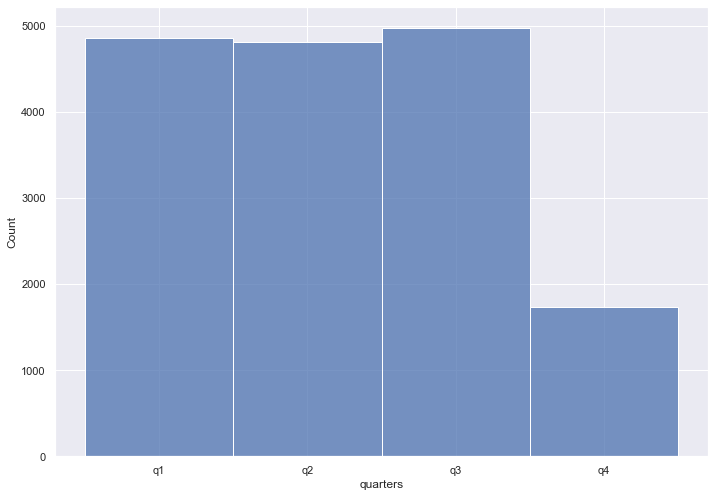

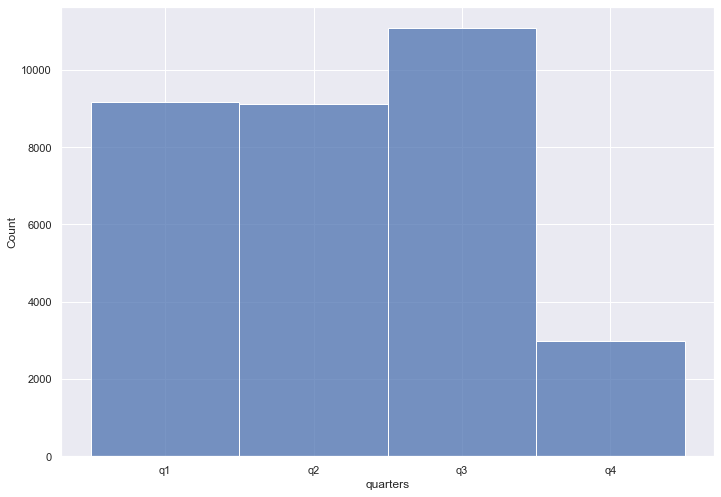

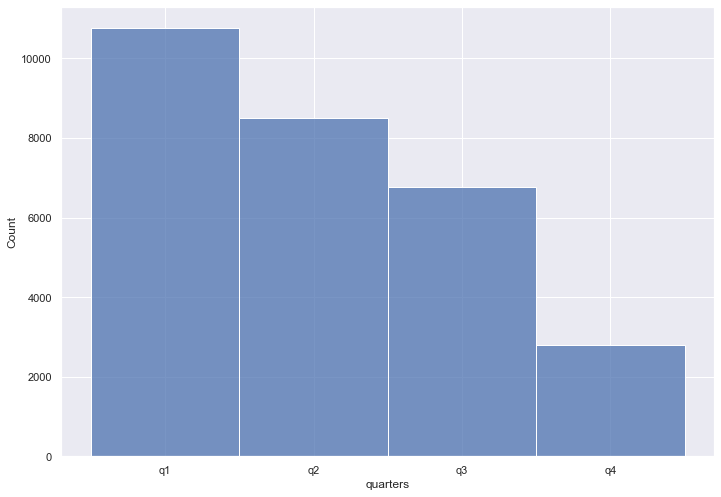

In [380]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

x = range(0, 21)

for i in x:
    plt.figure()
    sns.histplot(x = cohort_df3[i]['quarters'])

plt.show()

### sns.barplot(cohort_df3[1].date_time)

By cohort, we generally see access drop a lot in the last quarter. This makes sense as a lot of students are likely working on capstones and whatnot

In [282]:
cohort_df3[5].days.max()

Timedelta('171 days 07:15:43')

In [331]:
df3.date_time.max()

Timestamp('2021-04-21 16:32:36')

In [339]:
df3.user_id.value_counts().mean() #aver access

1031.626334519573

In [341]:
df3.user_id.value_counts().min()

1

In [363]:
df3.user_id.value_counts().quantile(.1) #lower that 279

278.1

In [382]:
df3['program_cohort'] = df3['program'] + '_' + df3['cohort']

In [389]:
counts = df3.user_id.value_counts()

In [465]:
counts = df3.user_id.value_counts()
bottom_1 = df3[df3['user_id'].isin(counts[counts < 10].index)]
bottom_5 = df3[df3['user_id'].isin(counts[counts < 113].index)]
bottom_10 = df3[df3['user_id'].isin(counts[counts < 279].index)]
bottom_30 = df3[df3['user_id'].isin(counts[counts < 671].index)]
top_10 = df3[df3['user_id'].isin(counts[counts > 1733].index)]

In [837]:
counts = df3.user_id.value_counts()
df3['bottom'] = df3['user_id'].isin(counts[counts < 113])

In [849]:
df.date_time.max()

Timestamp('2021-04-21 16:44:39')

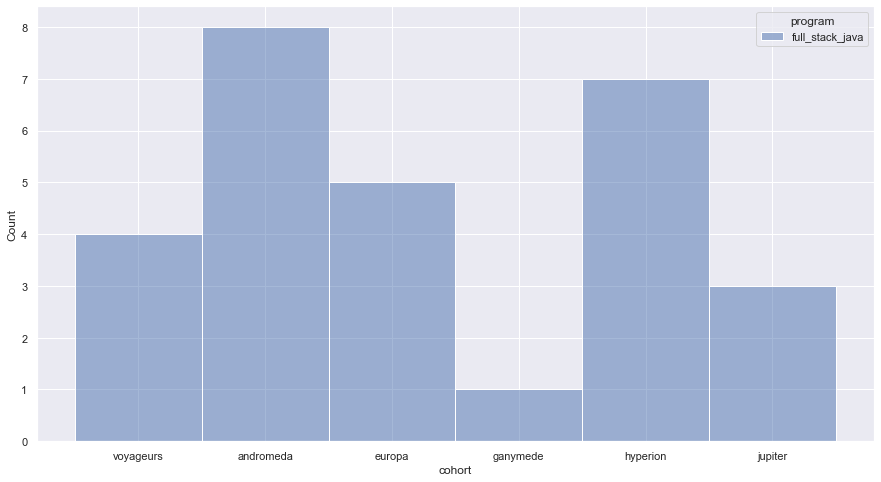

In [407]:
plt.figure(figsize=(15,8))
#sns.countplot(bottom_1.program_cohort)
sns.histplot(data = bottom_1, x= 'cohort', hue='program')
plt.show()

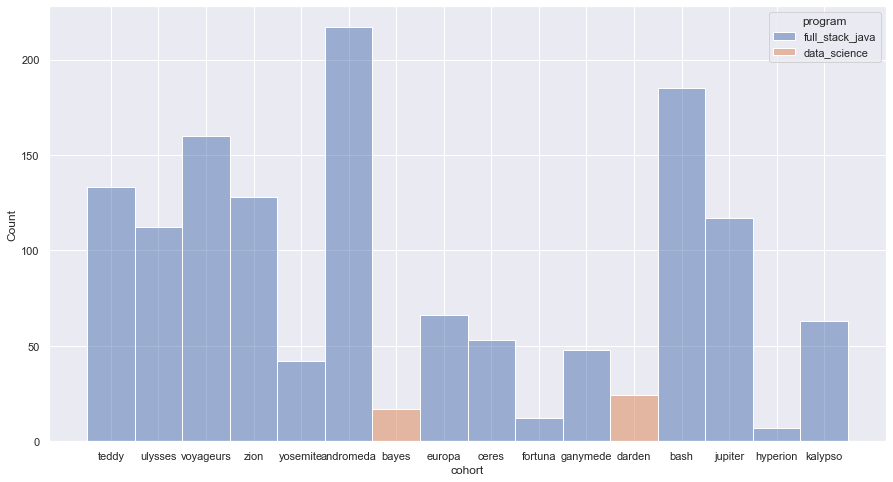

In [406]:
plt.figure(figsize=(15,8))
#sns.countplot(bottom_1.program_cohort)
sns.histplot(data = bottom_5, x= 'cohort', hue='program')
plt.show()

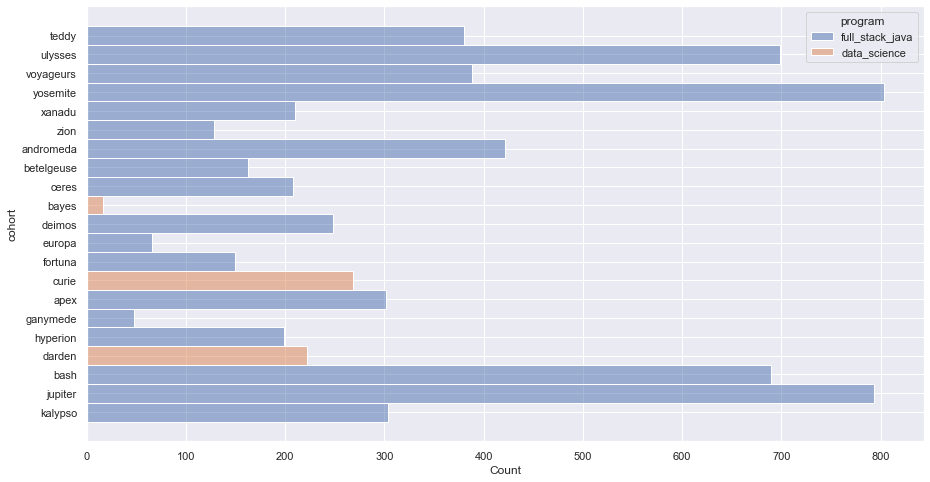

In [646]:
plt.figure(figsize=(15,8))
#sns.countplot(bottom_1.program_cohort)
sns.histplot(data = bottom_10, y= 'cohort', hue='program')
plt.show()

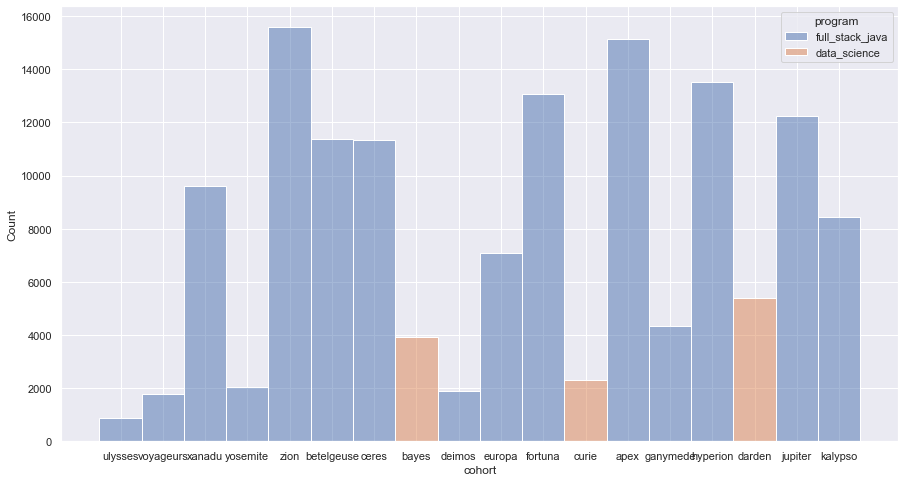

In [410]:
plt.figure(figsize=(15,8))
#sns.countplot(bottom_1.program_cohort)
sns.histplot(data = top_10, x= 'cohort', hue='program')
plt.show()

<AxesSubplot:xlabel='month_start', ylabel='month_access'>

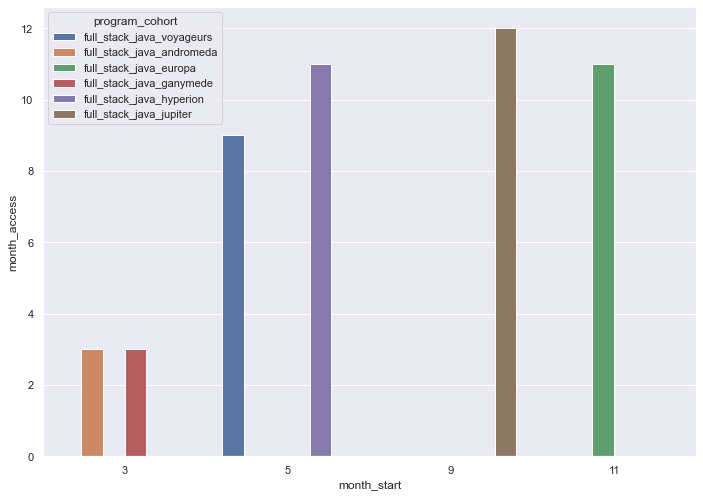

In [411]:
bottom_1[['start_date', 'end_date', 'date_time']]
bottom_1['month_start'] = bottom_1.start_date.dt.month
bottom_1['month_access'] = bottom_1.date_time.dt.month
sns.barplot(x='month_start', y='month_access', data=bottom_1, hue='program_cohort')

In [530]:
students = df3.groupby(df3.user_id).max()

In [417]:
students['day'] = students['end_date'] - students['date_time']

In [428]:
students.day.mean() #average student last day access in program is 23 days from graduation

Timedelta('23 days 01:17:22.117437722')

In [424]:
bottom_1_s = bottom_1.groupby(bottom_1.user_id).max()

In [429]:
bottom_1_s.info() 
#6 students here all web dev, all diff cohorts, 4 out of 6 stopped accessing very early on,
#likely dropped out

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 278 to 832
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   path            6 non-null      object         
 1   ip              6 non-null      object         
 2   cohort          6 non-null      object         
 3   start_date      6 non-null      datetime64[ns] 
 4   end_date        6 non-null      datetime64[ns] 
 5   created_at      6 non-null      datetime64[ns] 
 6   updated_at      6 non-null      datetime64[ns] 
 7   program         6 non-null      object         
 8   date_time       6 non-null      datetime64[ns] 
 9   program_access  6 non-null      bool           
 10  days            6 non-null      timedelta64[ns]
 11  program_cohort  6 non-null      object         
 12  month_start     6 non-null      int64          
 13  month_access    6 non-null      int64          
 14  day             6 non-null      timedelta6

In [430]:
bottom_1_s

,path,ip,cohort,start_date,end_date,created_at,updated_at,program,date_time,program_access,days,program_cohort,month_start,month_access,day
user_id,,,,,,,,,,,,,,,
278,java-ii/collections,97.105.19.58,voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,full_stack_java,2018-09-27 14:59:07,True,121 days 14:59:07,full_stack_java_voyageurs,5,9,13 days 09:00:53
388,html-css/forms,97.105.19.58,andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,full_stack_java,2019-03-19 12:19:23,True,1 days 12:19:23,full_stack_java_andromeda,3,3,132 days 11:40:37
539,toc,97.105.19.58,europa,2019-11-04,2020-04-17,2019-11-04 18:27:07,2019-11-04 18:27:07,full_stack_java,2019-11-04 16:54:45,True,0 days 16:54:45,full_stack_java_europa,11,11,164 days 07:05:15
619,/,97.105.19.58,ganymede,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,full_stack_java,2020-03-23 14:10:17,True,0 days 14:10:17,full_stack_java_ganymede,3,3,149 days 09:49:43
812,html-css/forms,24.243.49.105,hyperion,2020-05-26,2020-11-10,2020-05-26 19:22:44,2020-05-26 19:22:44,full_stack_java,2020-11-08 01:46:07,True,166 days 01:46:07,full_stack_java_hyperion,5,11,1 days 22:13:53
832,javascript-i,69.154.52.98,jupiter,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,full_stack_java,2020-12-07 14:22:39,True,77 days 14:22:39,full_stack_java_jupiter,9,12,112 days 09:37:21


In [425]:
bottom_1_s['day'] = bottom_1_s['end_date'] - bottom_1_s['date_time']

In [427]:
bottom_1_s['day'].min(), bottom_1_s['day'].max(), bottom_1_s['day'].mean() #average 95 days from grauation

(Timedelta('1 days 22:13:53'),
 Timedelta('164 days 07:05:15'),
 Timedelta('95 days 15:34:37'))

In [496]:
bottom_5_s = bottom_5.groupby(bottom_5.user_id).max()
bottom_5_s['day'] = bottom_5_s['end_date'] - bottom_5_s['date_time']
bottom_5_s['day'].min(), bottom_5_s['day'].max(), bottom_5_s['day'].mean() #average 95 days from grauation

(Timedelta('0 days 11:17:09'),
 Timedelta('187 days 09:05:40'),
 Timedelta('94 days 21:36:52.551724138'))

In [467]:
len(bottom_5_s)

29

In [663]:
bottom_1_s.start_date.min() 

Timestamp('2018-05-29 00:00:00')

In [649]:
bottom_5_s['start_date'].groubyby('program_cohort').min()

AttributeError: 'Series' object has no attribute 'groubyby'

In [464]:
bottom_5_s['days']

user_id
13     114 days 17:15:29
46      35 days 18:04:04
64      78 days 09:37:12
125     10 days 13:57:57
250    119 days 17:18:19
253    122 days 14:29:11
278    121 days 14:59:07
340      0 days 18:45:22
342      6 days 16:40:51
371    144 days 13:36:04
388      1 days 12:19:23
431    126 days 11:13:31
432    133 days 12:42:51
487     11 days 15:43:38
529      4 days 10:54:44
539                  NaN
543                  NaN
572                  NaN
619                  NaN
679                  NaN
697                  NaN
702                  NaN
734                  NaN
741                  NaN
772                  NaN
806                  NaN
812                  NaN
832                  NaN
858                  NaN
Name: days, dtype: object

In [472]:
bottom_5_s['days'] = bottom_5_s['days'].astype(str)

In [473]:
bottom_5_s['days']

user_id
13     114 days 17:15:29
46      35 days 18:04:04
64      78 days 09:37:12
125     10 days 13:57:57
250    119 days 17:18:19
253    122 days 14:29:11
278    121 days 14:59:07
340      0 days 18:45:22
342      6 days 16:40:51
371    144 days 13:36:04
388      1 days 12:19:23
431    126 days 11:13:31
432    133 days 12:42:51
487     11 days 15:43:38
529      4 days 10:54:44
539      0 days 16:54:45
543    138 days 18:01:40
572      1 days 16:13:23
619      0 days 14:10:17
679      1 days 08:05:15
697      0 days 15:26:39
702     14 days 14:09:20
734     42 days 17:38:19
741    148 days 14:55:40
772      2 days 14:54:20
806     74 days 10:46:38
812    166 days 01:46:07
832     77 days 14:22:39
858     87 days 10:07:51
Name: days, dtype: object

In [497]:
bottom_5_s['day'] = bottom_5_s['day'].astype(str)
bottom_5_s['day'] = bottom_5_s['day'].str[:-14]
bottom_5_s['day'] = bottom_5_s['day'].astype(int)
len(bottom_5_s['day']), (bottom_5_s['day'] > 30).sum(), (bottom_5_s['day'] > 30).sum()/len(bottom_5_s['day'])

(29, 19, 0.6551724137931034)

In [531]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 2 to 858
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   path            562 non-null    object        
 1   ip              562 non-null    object        
 2   cohort          562 non-null    object        
 3   start_date      562 non-null    datetime64[ns]
 4   end_date        562 non-null    datetime64[ns]
 5   created_at      562 non-null    datetime64[ns]
 6   updated_at      562 non-null    datetime64[ns]
 7   program         562 non-null    object        
 8   date_time       562 non-null    datetime64[ns]
 9   program_access  562 non-null    bool          
 10  days            562 non-null    int64         
 11  program_cohort  562 non-null    object        
dtypes: bool(1), datetime64[ns](5), int64(1), object(5)
memory usage: 53.2+ KB


In [532]:
students['day'] = students['end_date'] - students['date_time']

In [533]:
students['day'] = students['day'].astype(str)
students['day'] = students['day'].str[:-14]
students['day'] = students['day'].astype(int)
len(students['day']), (students['day'] > 30).sum(), (students['day'] > 30).sum()/len(students['day'])

(562, 107, 0.1903914590747331)

In [498]:
bottom_1_s['day'] = bottom_1_s['day'].astype(str)
bottom_1_s['day'] = bottom_1_s['day'].str[:-14]
bottom_1_s['day'] = bottom_1_s['day'].astype(int)
len(bottom_1_s['day']), (bottom_1_s['day'] > 30).sum(), (bottom_1_s['day'] > 30).sum()/len(bottom_1_s['day'])

(6, 4, 0.6666666666666666)

In [499]:
bottom_10

,path,user_id,ip,cohort,start_date,end_date,created_at,updated_at,program,date_time,program_access,days,program_cohort
44,javascript-i/functions,13,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 10:33:25,True,18 days 10:33:25,full_stack_java_teddy
89,javascript-i/conditionals,13,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 11:25:23,True,18 days 11:25:23,full_stack_java_teddy
232,javascript-i/javascript-with-html,13,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 13:50:32,True,18 days 13:50:32,full_stack_java_teddy
233,javascript-i/functions,13,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 13:50:57,True,18 days 13:50:57,full_stack_java_teddy
287,javascript-i/javascript-with-html,13,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 14:27:22,True,18 days 14:27:22,full_stack_java_teddy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797997,java-iii/sessions-and-cookies,856,45.20.118.158,jupiter,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,full_stack_java,2021-01-25 15:46:44,True,126 days 15:46:44,full_stack_java_jupiter
798573,java-i/methods,858,173.175.19.30,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2021-01-26 08:55:00,True,85 days 08:55:00,full_stack_java_kalypso
801138,java-i/methods,858,173.175.19.30,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2021-01-27 12:06:41,True,86 days 12:06:41,full_stack_java_kalypso
802114,html-css/elements,858,173.175.19.30,kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,full_stack_java,2021-01-28 09:40:16,True,87 days 09:40:16,full_stack_java_kalypso


In [501]:
bottom_10_s = bottom_10.groupby(bottom_10.user_id).max()
bottom_10_s['day'] = bottom_10_s['end_date'] - bottom_10_s['date_time']
bottom_10_s['day'] = bottom_10_s['day'].astype(str)
bottom_10_s['day'] = bottom_10_s['day'].str[:-14]
bottom_10_s['day'] = bottom_10_s['day'].astype(int)
len(bottom_10_s['day']), (bottom_10_s['day'] > 30).sum(), (bottom_10_s['day'] > 30).sum()/len(bottom_10_s['day'])

(57, 37, 0.6491228070175439)

In [504]:
bottom_30_s = bottom_30.groupby(bottom_30.user_id).max()
bottom_30_s['day'] = bottom_30_s['end_date'] - bottom_30_s['date_time']
bottom_30_s['day'] = bottom_30_s['day'].astype(str)
bottom_30_s['day'] = bottom_30_s['day'].str[:-14]
bottom_30_s['day'] = bottom_30_s['day'].astype(int)
len(bottom_30_s['day']), (bottom_30_s['day'] > 30).sum(), (bottom_30_s['day'] > 30).sum()/len(bottom_30_s['day'])

(169, 74, 0.4378698224852071)

In [505]:
top_10_s = top_10.groupby(top_10.user_id).max()
top_10_s['day'] = top_10_s['end_date'] - top_10_s['date_time']
top_10_s['day'] = top_10_s['day'].astype(str)
top_10_s['day'] = top_10_s['day'].str[:-14]
top_10_s['day'] = top_10_s['day'].astype(int)
len(top_10_s['day']), (top_10_s['day'] > 30).sum(), (top_10_s['day'] > 30).sum()/len(top_10_s['day'])

(62, 4, 0.06451612903225806)

In [507]:
len(students['day']), (students['day'] > 100).sum(), (students['day'] > 100).sum()/len(students['day'])

(562, 49, 0.08718861209964412)

In [508]:
len(bottom_1_s['day']), (bottom_1_s['day'] > 100).sum(), (bottom_1_s['day'] > 100).sum()/len(bottom_1_s['day'])

(6, 4, 0.6666666666666666)

In [510]:
len(bottom_10_s['day']), (bottom_10_s['day'] > 100).sum(), (bottom_10_s['day'] > 100).sum()/len(bottom_10_s['day'])

(57, 30, 0.5263157894736842)

In [511]:
len(bottom_30_s['day']), (bottom_30_s['day'] > 100).sum(), (bottom_30_s['day'] > 100).sum()/len(bottom_30_s['day'])

(169, 47, 0.2781065088757396)

In [512]:
len(top_10_s['day']), (top_10_s['day'] > 100).sum(), (top_10_s['day'] > 100).sum()/len(top_10_s['day'])

(62, 0, 0.0)

In [513]:
len(bottom_30_s['day']), (bottom_30_s['day'] > 60).sum(), (bottom_30_s['day'] > 60).sum()/len(bottom_30_s['day'])

(169, 70, 0.41420118343195267)

<AxesSubplot:xlabel='day', ylabel='count'>

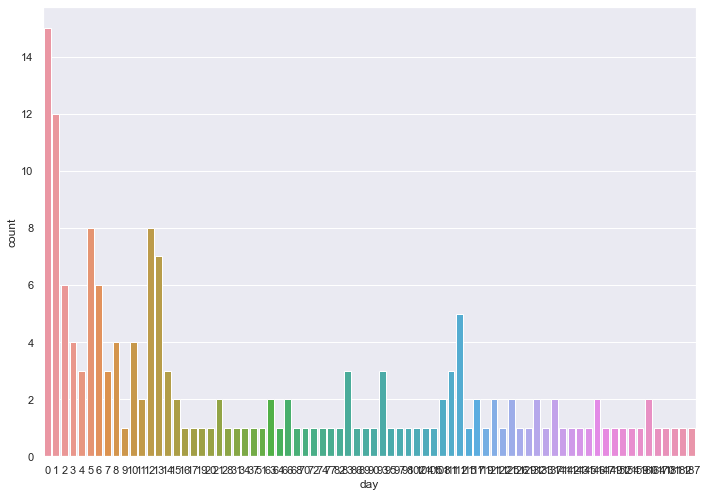

In [516]:
sns.countplot(data= bottom_30_s, x='day')

<AxesSubplot:xlabel='day', ylabel='Count'>

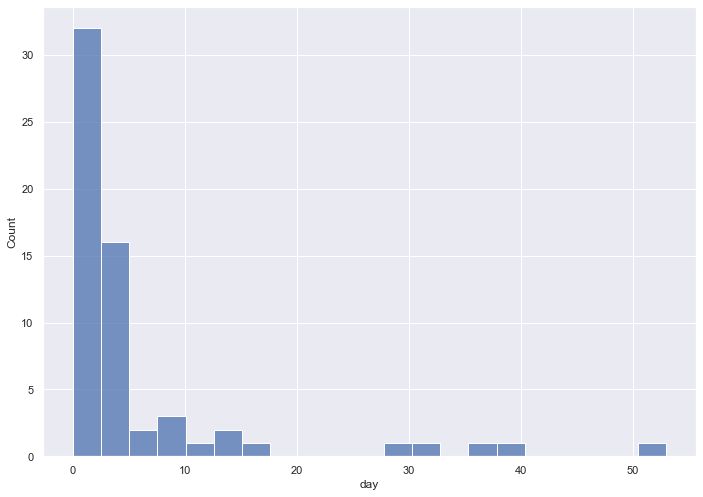

In [518]:
sns.histplot(data= top_10_s, x='day')

<AxesSubplot:xlabel='day', ylabel='Count'>

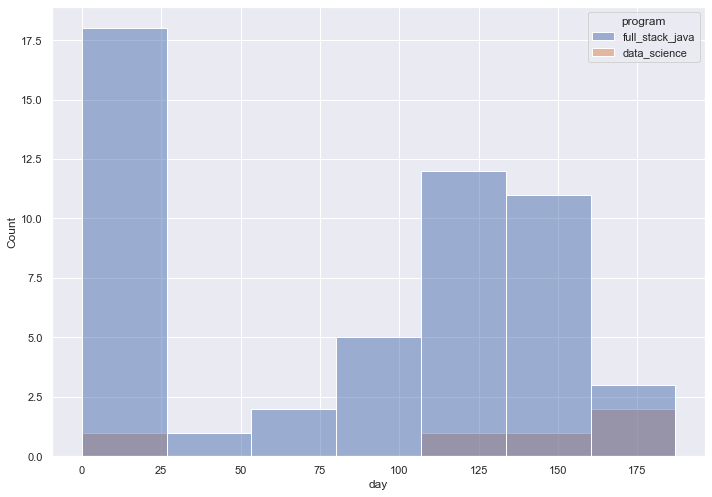

In [537]:
sns.histplot(data= bottom_10_s, x='day', hue='program')

<AxesSubplot:xlabel='day', ylabel='Count'>

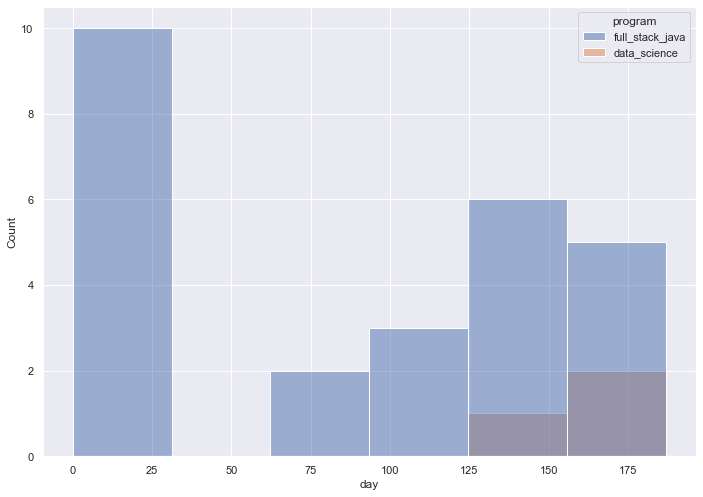

In [536]:
sns.histplot(data= bottom_5_s, x='day', hue='program')

<AxesSubplot:xlabel='day', ylabel='Count'>

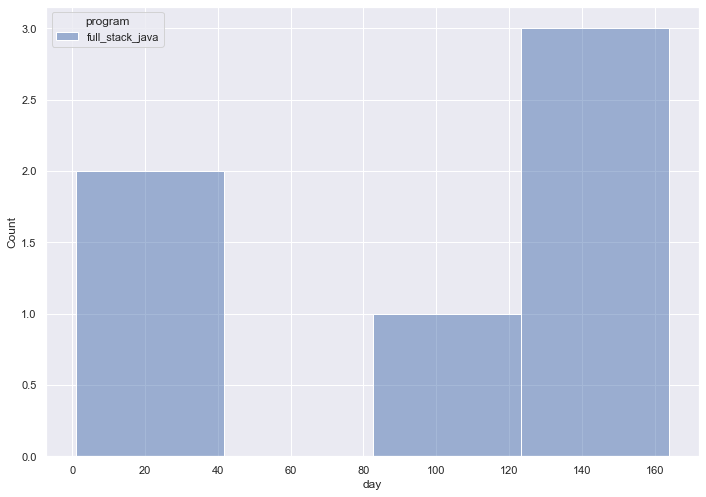

In [535]:
sns.histplot(data= bottom_1_s, x='day', hue='program')

<AxesSubplot:xlabel='day', ylabel='Count'>

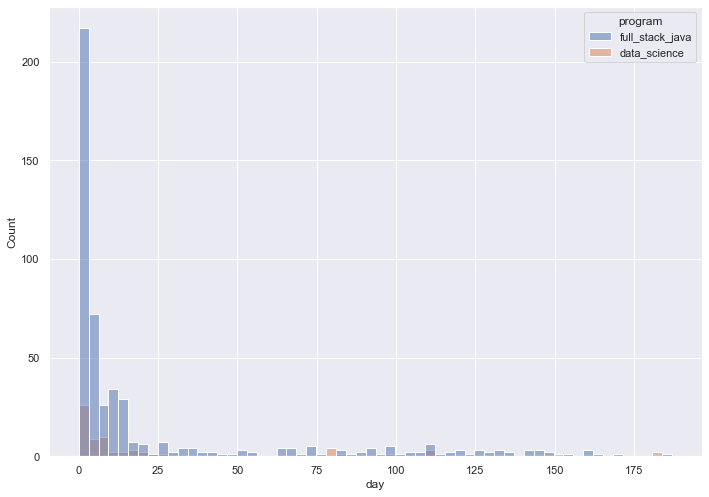

In [538]:
sns.histplot(data= students, x='day', hue='program')

In [568]:
ds = df3[df3.program == 'data_science']

In [569]:
fs = df3[df3.program == 'full_stack_java']

In [811]:
df3.user_id.value_counts().quantile(.05)

112.05

In [819]:
ds_counts = df3.user_id.value_counts()
fs_bottom = df3[df3['user_id'].isin(ds_counts[ds_counts < 113].index)]

In [820]:
len(fs_bottom)

1384

In [593]:

fs_counts = fs.user_id.value_counts()
ds_bottom = ds[ds['user_id'].isin(ds_counts[ds_counts < 408].index)]
fs_bottom = fs[fs['user_id'].isin(fs_counts[fs_counts < 255].index)]

In [580]:
ds_bottom_s = ds_bottom.groupby(ds_bottom.user_id).max()
ds_bottom_s['day'] = ds_bottom_s['end_date'] - ds_bottom_s['date_time']
ds_bottom_s['day'] = ds_bottom_s['day'].astype(str)
ds_bottom_s['day'] = ds_bottom_s['day'].str[:-14]
ds_bottom_s['day'] = ds_bottom_s['day'].astype(int)
len(ds_bottom_s['day']), (ds_bottom_s['day'] > 30).sum(), (ds_bottom_s['day'] > 30).sum()/len(ds_bottom_s['day'])

(21, 6, 0.2857142857142857)

In [581]:
fs_bottom_s = fs_bottom.groupby(fs_bottom.user_id).max()
fs_bottom_s['day'] = fs_bottom_s['end_date'] - fs_bottom_s['date_time']
fs_bottom_s['day'] = fs_bottom_s['day'].astype(str)
fs_bottom_s['day'] = fs_bottom_s['day'].str[:-14]
fs_bottom_s['day'] = fs_bottom_s['day'].astype(int)
len(fs_bottom_s['day']), (fs_bottom_s['day'] > 30).sum(), (fs_bottom_s['day'] > 30).sum()/len(fs_bottom_s['day'])

(148, 69, 0.46621621621621623)

<AxesSubplot:xlabel='day', ylabel='Count'>

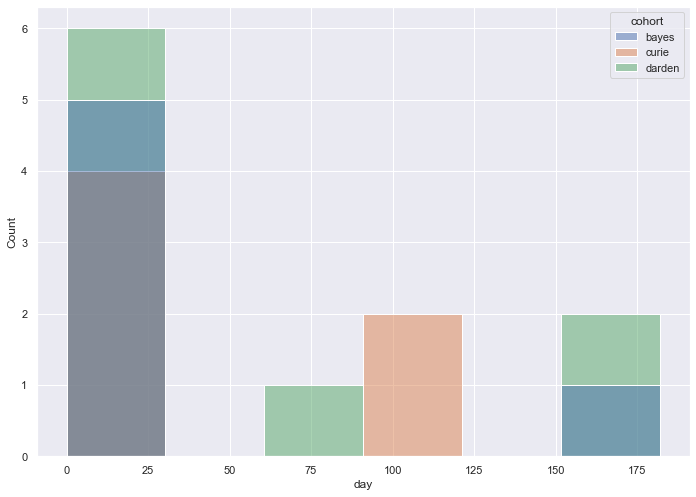

In [594]:
sns.histplot(data= ds_bottom_s, x='day', hue='cohort')

<AxesSubplot:xlabel='day', ylabel='Count'>

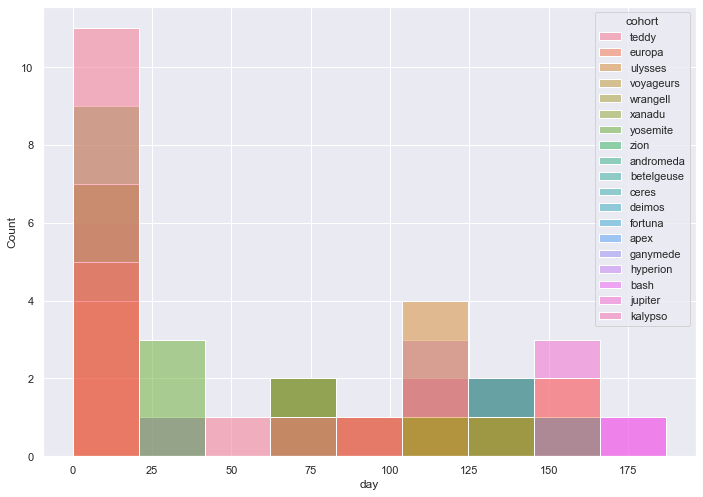

In [595]:
sns.histplot(data= fs_bottom_s, x='day', hue='cohort')

In [563]:
(fs_bottom).user_id.nunique()

21

In [596]:
len(fs_bottom_s)

148

In [599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        900222 non-null  object        
 1   user_id     900223 non-null  int64         
 2   cohort_id   847330 non-null  float64       
 3   ip          900223 non-null  object        
 4   name        847330 non-null  object        
 5   start_date  847330 non-null  datetime64[ns]
 6   end_date    847330 non-null  datetime64[ns]
 7   created_at  847330 non-null  datetime64[ns]
 8   updated_at  847330 non-null  datetime64[ns]
 9   program_id  847330 non-null  object        
 10  date_time   900223 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(1), int64(1), object(4)
memory usage: 75.5+ MB


In [611]:
min = df[['name', 'start_date', 'end_date']].groupby(df.start_date).min()

In [612]:
min

,name,start_date,end_date
start_date,,,
2014-02-04,arches,2014-02-04,2014-02-04
2014-06-04,badlands,2014-06-04,2014-08-22
2014-10-20,denali,2014-10-20,2015-01-18
2014-11-18,everglades,2014-11-18,2015-02-24
2015-02-03,franklin,2015-02-03,2015-05-26
2015-03-30,apollo,2015-03-30,2015-07-29
2015-06-05,glacier,2015-06-05,2015-10-06
2015-09-22,hampton,2015-09-22,2016-02-06
2016-01-20,ike,2016-01-20,2016-05-12


In [613]:
max

,name,start_date,end_date
start_date,,,
2014-02-04,staff,2014-02-04,2014-04-22
2014-06-04,badlands,2014-06-04,2014-08-22
2014-10-20,denali,2014-10-20,2015-01-18
2014-11-18,everglades,2014-11-18,2015-02-24
2015-02-03,franklin,2015-02-03,2015-05-26
2015-03-30,apollo,2015-03-30,2015-07-29
2015-06-05,glacier,2015-06-05,2015-10-06
2015-09-22,hampton,2015-09-22,2016-02-06
2016-01-20,ike,2016-01-20,2016-05-12


In [619]:
df[(df.name == 'oberon').groupby(df.date_time).max()]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
easley', 'florence', 'neptune',  'sequoia', 'oberon', 'luna', 'marco

In [645]:
df.date_time.groupby(df.name == 'ulysses').max()

name
False   2021-04-21 16:44:39
True    2021-04-21 13:55:47
Name: date_time, dtype: datetime64[ns]

In [643]:
df[(df.name == 'sequoia')]

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
23,mkdocs/search_index.json,10,21.0,97.105.19.61,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 10:08:22
24,git/merge-conflict-demo,10,21.0,97.105.19.61,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 10:08:34
25,mkdocs/search_index.json,10,21.0,97.105.19.61,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 10:08:45
26,git/working-in-teams,10,21.0,97.105.19.61,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 10:08:55
39,/,10,21.0,97.105.19.61,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2018-01-26 10:18:22
...,...,...,...,...,...,...,...,...,...,...,...
655285,forms,10,21.0,99.47.142.88,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2020-08-30 00:28:20
655302,html-css/forms,10,21.0,99.47.142.88,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2020-08-30 10:24:15
666542,/,10,21.0,99.47.142.88,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2020-09-10 22:47:01
666543,javascript-ii,10,21.0,99.47.142.88,sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,full_stack_java,2020-09-10 22:47:05


In [702]:
len(fs_bottom_s)

148

In [708]:
fs_bottom = fs_bottom.drop(columns=['program_access', 'days'])

In [729]:
user_13 = fs_bottom[fs_bottom.user_id == 13]

In [734]:
user_13

,path,user_id,ip,cohort,start_date,end_date,created_at,updated_at,program,program_cohort
date_time,,,,,,,,,,
2018-01-26 10:33:25,javascript-i/functions,13,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,full_stack_java_teddy
2018-01-26 11:25:23,javascript-i/conditionals,13,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,full_stack_java_teddy
2018-01-26 13:50:32,javascript-i/javascript-with-html,13,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,full_stack_java_teddy
2018-01-26 13:50:57,javascript-i/functions,13,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,full_stack_java_teddy
2018-01-26 14:27:22,javascript-i/javascript-with-html,13,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,full_stack_java_teddy
...,...,...,...,...,...,...,...,...,...,...
2018-02-01 10:18:11,javascript-i/objects,13,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,full_stack_java_teddy
2018-02-01 10:18:15,javascript-i/arrays/manipulating,13,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,full_stack_java_teddy
2018-02-01 13:37:27,javascript-i/objects,13,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,full_stack_java_teddy


array([[<AxesSubplot:title={'center':'start_date'}>,
        <AxesSubplot:title={'center':'end_date'}>],
       [<AxesSubplot:title={'center':'created_at'}>,
        <AxesSubplot:title={'center':'updated_at'}>]], dtype=object)

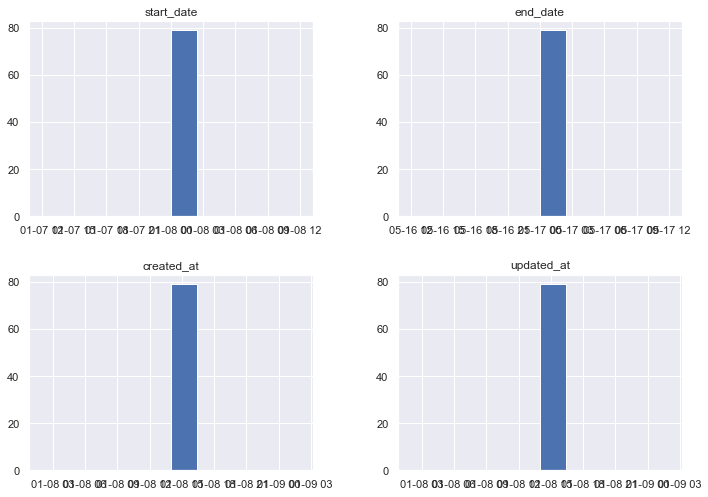

In [735]:
user_13.hist()

In [736]:
user_13 = user_13.reset_index()

<AxesSubplot:xlabel='date_time', ylabel='Count'>

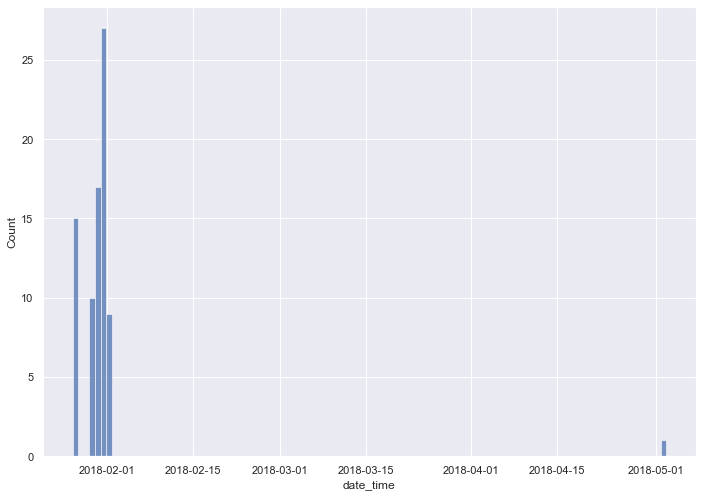

In [743]:
sns.histplot(x= 'date_time', data=user_13)

In [744]:
user_13 = user_13.set_index('date_time').sort_index()

In [745]:
user_13['weekday_name'] = user_13.index.day_name()

In [756]:
user_13['hour'] = user_13.index.time

In [762]:
user_13.weekday_name.value_counts()

Wednesday    28
Tuesday      17
Friday       15
Monday       10
Thursday      9
Name: weekday_name, dtype: int64

In [771]:
user_13['hour'] = user_13['hour'].astype(str)
user_13['hour'] = user_13['hour'].str[:-6]

In [772]:
user_13['hour'].value_counts()

10    17
09    15
11    14
15    10
08     8
14     7
13     3
12     3
16     1
17     1
Name: hour, dtype: int64

In [813]:
fs_bottom

,path,user_id,ip,cohort,start_date,end_date,created_at,updated_at,program,program_access,days,program_cohort,weekday_name,hour
date_time,,,,,,,,,,,,,,
2019-08-30 12:01:29,/,487,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,True,11,data_science_bayes,Friday,12
2019-08-30 12:02:11,appendix/cli/1-intro,487,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,True,11,data_science_bayes,Friday,12
2019-08-30 12:11:10,appendix/cli/2-listing-files,487,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,True,11,data_science_bayes,Friday,12
2019-08-30 13:37:40,appendix/cli/0-overview,487,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,True,11,data_science_bayes,Friday,13
2019-08-30 13:37:58,appendix/cli-git-overview,487,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,True,11,data_science_bayes,Friday,13
2019-08-30 14:12:22,appendix/cli/3-file-paths,487,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,True,11,data_science_bayes,Friday,14
2019-08-30 14:19:45,appendix/cli/4-navigating-the-filesystem,487,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,True,11,data_science_bayes,Friday,14
2019-08-30 14:32:22,appendix/cli/5-creating-files-and-directories,487,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,True,11,data_science_bayes,Friday,14
2019-08-30 14:38:57,appendix/cli/4-navigating-the-filesystem,487,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,True,11,data_science_bayes,Friday,14


In [821]:
#fs_bottom = fs_bottom.set_index('date_time').sort_index()
fs_bottom['weekday_name'] = fs_bottom.index.day_name()
fs_bottom['hour'] = fs_bottom.index.time
fs_bottom['hour'] = fs_bottom['hour'].astype(str)
fs_bottom['hour'] = fs_bottom['hour'].str[:-6]

In [840]:
#df3 = df3.set_index('date_time').sort_index()
df3['weekday_name'] = df3.index.day_name()
df3['hour'] = df3.index.time
df3['hour'] = df3['hour'].astype(str)
df3['hour'] = df3['hour'].str[:-6]

In [780]:
fs_users = []
unique_users = set(list(fs_bottom['user_id']))
for user in unique_users:
  fs_users.append(fs_bottom.loc[fs_bottom['user_id'] == user,:])

# this is the first dataframe of the list.
fs_users[49]

,path,user_id,ip,cohort,start_date,end_date,created_at,updated_at,program,program_cohort,weekday_name,hour
date_time,,,,,,,,,,,,
2018-03-05 15:20:56,/,126,97.105.19.61,ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,full_stack_java,full_stack_java_ulysses,Monday,15
2018-03-05 15:21:08,html-css,126,97.105.19.61,ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,full_stack_java,full_stack_java_ulysses,Monday,15
2018-03-05 15:31:52,html-css/introduction,126,97.105.19.61,ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,full_stack_java,full_stack_java_ulysses,Monday,15
2018-03-05 20:38:24,html-css/elements,126,67.10.153.249,ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,full_stack_java,full_stack_java_ulysses,Monday,20
2018-03-06 13:34:47,html-css/forms,126,97.105.19.61,ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,full_stack_java,full_stack_java_ulysses,Tuesday,13
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-28 10:11:12,javascript-i/objects,126,97.105.19.61,ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,full_stack_java,full_stack_java_ulysses,Wednesday,10
2018-03-28 10:11:38,javascript-i/arrays,126,97.105.19.61,ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,full_stack_java,full_stack_java_ulysses,Wednesday,10
2018-03-28 10:30:38,javascript-i/arrays/manipulating,126,97.105.19.61,ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,full_stack_java,full_stack_java_ulysses,Wednesday,10


<AxesSubplot:xlabel='hour', ylabel='count'>

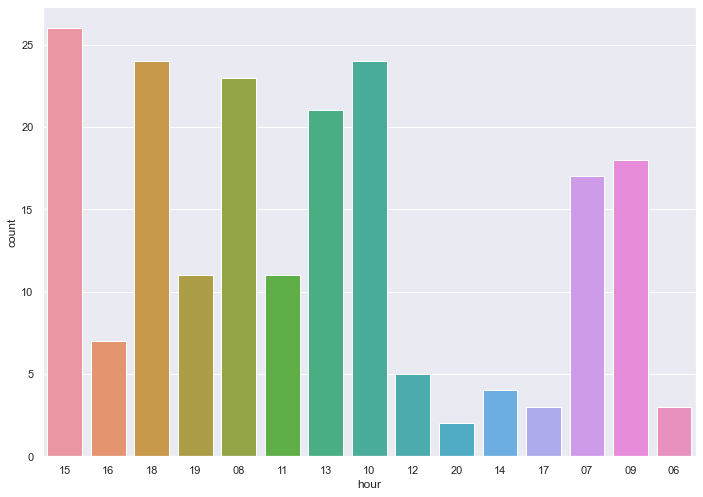

In [792]:
sns.countplot(fs_users[0].hour)

ValueError: cannot set using a list-like indexer with a different length than the value

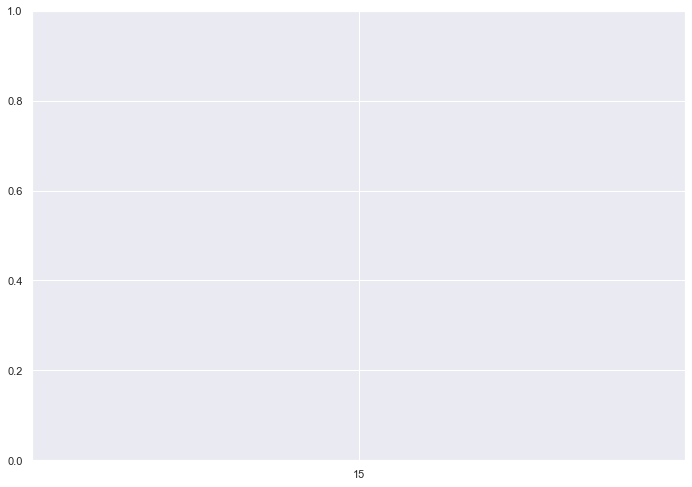

In [787]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

x = range(0, 10)

for i in x:
    plt.figure()
    sns.histplot(x = fs_users[i]['hour'])

plt.show()

In [818]:
fs_bottom.user_id.value_counts()

487    17
697    13
679    11
Name: user_id, dtype: int64

<AxesSubplot:xlabel='weekday_name', ylabel='count'>

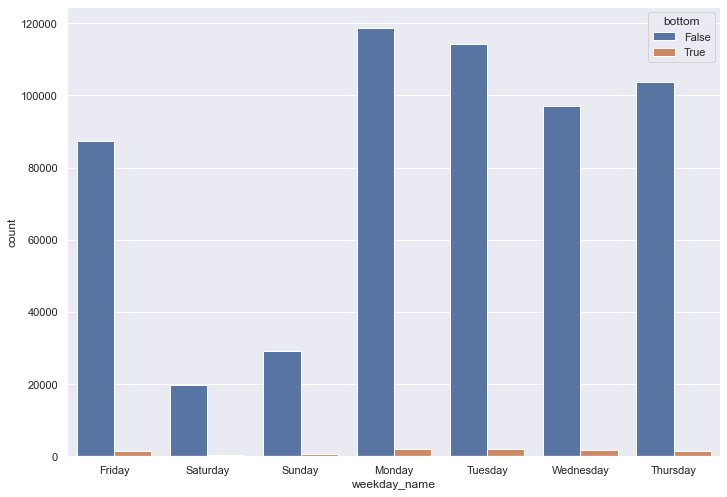

In [847]:
sns.countplot(data=df3, x='weekday_name', hue='bottom')

<AxesSubplot:>

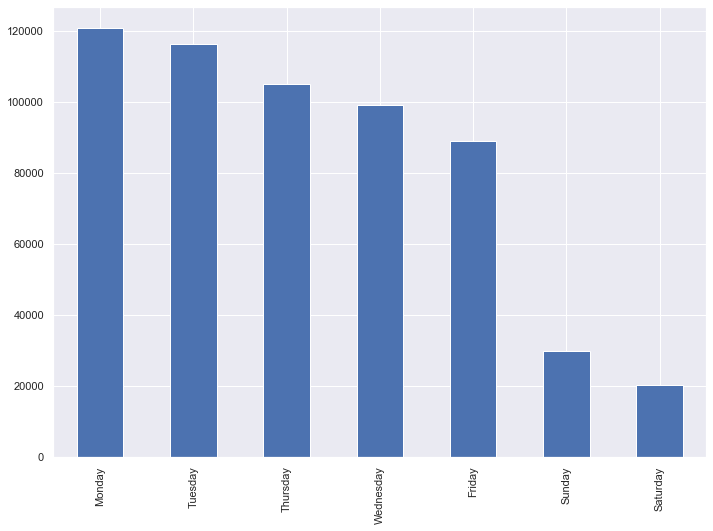

In [800]:
df3.weekday_name.value_counts().plot(kind='bar')

bottom 5% bigger drop in week

<AxesSubplot:>

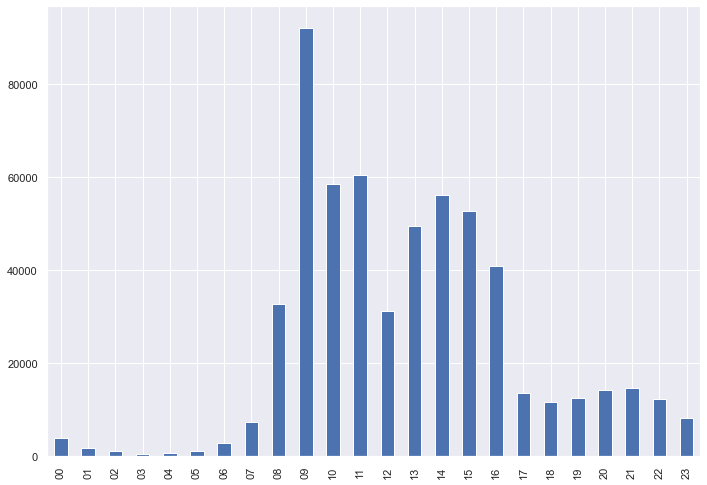

In [824]:
df3.hour.value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

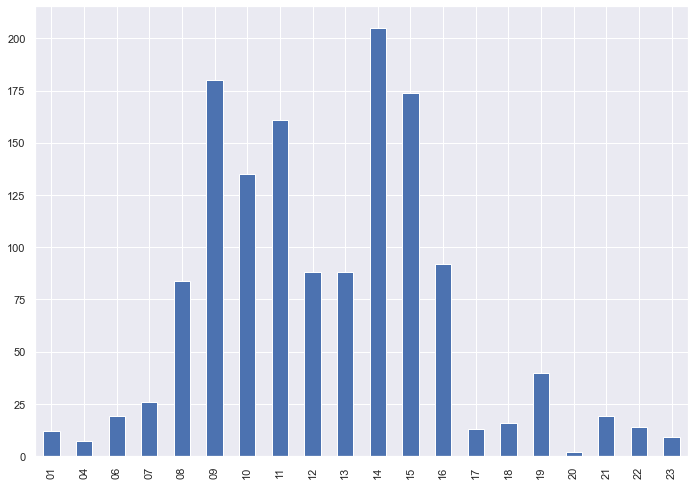

In [825]:
fs_bottom.hour.value_counts().sort_index().plot(kind='bar')

does not have a huge jump at 9am. looks like more consistent homework time and bottom has more odd hours.

<AxesSubplot:>

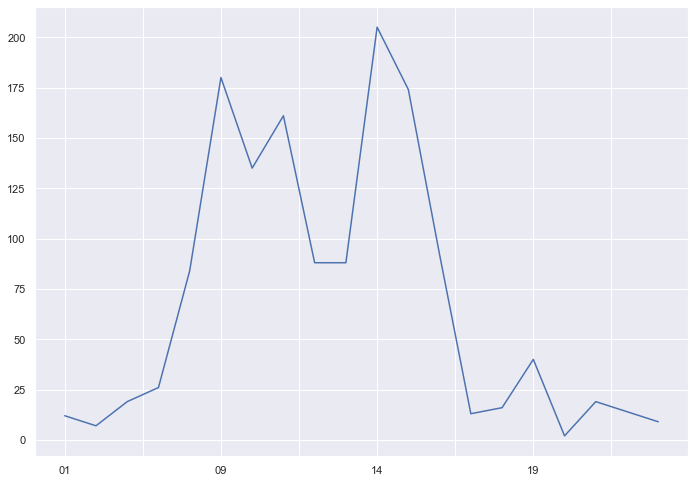